# Part I - Flight Delays Exploration and Visualisation
## by Gladys Dalla

## Introduction
> The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

For each flight the following data was recorded:
    
1. Identification information:  flight number, date and tail number (air-craft identification)
2. Flight information: carrier code (like AA for American Airlines), origin and destination airports codes
3. Time information: scheduled and actual departure (or arrival) hour, and their difference being the departure or arrival delay (with a one-minute precision)
4. Flight duration information: scheduled and actual duration
5. On-ground information: taxiing duration and take-off or landing hour
6. Delay reason (if available): part of the delay that can be attributed to the carrier, to the weather, to the air traffic control, to security reasons or to late arrival of the aircraft from the previous flight


- As I will be running my analysis on my personal machine, which has a RAM and GB limit, I have chosen to only use the data for the years 2007 and 1997 as a comparison. I believe this dataset (12 million rows) will be sufficient for my EDA.


## Preliminary Wrangling

- Check Wranling file for this.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
#from datetime import datetime
import datetime as dt
import plotly.express as px
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Loading dataset


In [2]:
#Loading dataset

flight_90s = pd.read_csv('flight_90s.csv')
flight_2000s = pd.read_csv('flight_2000s.csv')
pd.set_option('display.max_columns', 29)
#pd.set_option('display.max_rows', 29)


In [3]:
flight_90s.sample(5)

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3551432,1997-09-23 00:00:00+00:00,9,23,Tuesday,810,800,957,945,HP,217.0,12.0,10.0,IND,PHX,0,NaN,0,NaN,1489,NaN,NaN,NaN,NaN
3756803,1997-09-23 00:00:00+00:00,9,23,Tuesday,1832,1833,1930,1933,US,49.0,-3.0,-1.0,ALB,PHL,0,NaN,0,NaN,212,NaN,NaN,NaN,NaN
826187,1997-02-24 00:00:00+00:00,2,24,Monday,2130,2130,2220,2220,WN,40.0,0.0,0.0,HOU,DAL,0,NaN,0,NaN,239,NaN,NaN,NaN,NaN
283065,1997-01-04 00:00:00+00:00,1,4,Saturday,830,0,1605,0,AA,250.0,-11.0,0.0,LAX,IAD,0,NaN,0,NaN,2288,NaN,NaN,NaN,NaN
319418,1997-01-14 00:00:00+00:00,1,14,Tuesday,2242,2245,139,147,DL,331.0,-8.0,-3.0,JFK,LAX,0,NaN,0,NaN,2475,NaN,NaN,NaN,NaN


In [4]:
flight_2000s[:5]

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007-01-01 00:00:00+00:00,1,1,Monday,1232,1225,1341,1340,WN,54.0,1.0,7.0,SMF,ONT,0,NaN,0,0,389,0,0,0,0
1,2007-01-01 00:00:00+00:00,1,1,Monday,1918,1905,2043,2035,WN,74.0,8.0,13.0,SMF,PDX,0,NaN,0,0,479,0,0,0,0
2,2007-01-01 00:00:00+00:00,1,1,Monday,2206,2130,2334,2300,WN,73.0,34.0,36.0,SMF,PDX,0,NaN,0,3,479,0,0,0,31
3,2007-01-01 00:00:00+00:00,1,1,Monday,1230,1200,1356,1330,WN,75.0,26.0,30.0,SMF,PDX,0,NaN,0,23,479,0,0,0,3
4,2007-01-01 00:00:00+00:00,1,1,Monday,831,830,957,1000,WN,74.0,-3.0,1.0,SMF,PDX,0,NaN,0,0,479,0,0,0,0


In [5]:
#view datasets

print(flight_90s.info(),'\n')
print(flight_2000s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301999 entries, 0 to 5301998
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   Month              int64  
 2   Day                int64  
 3   Week_day           object 
 4   DepTime            int64  
 5   CRSDepTime         int64  
 6   ArrTime            int64  
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   AirTime            float64
 10  ArrDelay           float64
 11  DepDelay           float64
 12  Origin             object 
 13  Dest               object 
 14  Cancelled          int64  
 15  CancellationCode   float64
 16  Diverted           int64  
 17  CarrierDelay       float64
 18  Distance           int64  
 19  WeatherDelay       float64
 20  NASDelay           float64
 21  SecurityDelay      float64
 22  LateAircraftDelay  float64
dtypes: float64(9), int64(9), object(5)
memory usage: 930.4+ MB
None 

<class 'pandas.c

In [6]:
print('Flight 90s shape:\n',flight_90s.shape,'\n')
print('Flight 2000s shape:\n',flight_2000s.shape)

Flight 90s shape:
 (5301999, 23) 

Flight 2000s shape:
 (7275261, 23)


In [7]:
flight_2000s.describe()

,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7275261.0,7275261.0,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06,7.275261e+06
mean,6.528177e+00,1.572369e+01,1.339201e+03,1.329359e+03,1.482104e+03,1.494028e+03,1.028158e+02,1.019221e+01,1.136211e+01,0.0,0.0,3.959775e+00,7.224405e+02,7.889269e-01,3.876239e+00,2.431610e-02,5.223860e+00
std,3.418684e+00,8.791408e+00,4.798831e+02,4.647926e+02,5.072232e+02,4.816344e+02,6.824583e+01,3.930780e+01,3.605687e+01,0.0,0.0,2.108689e+01,5.637841e+02,9.735721e+00,1.636239e+01,1.098178e+00,2.152105e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.120000e+02,-3.050000e+02,0.0,0.0,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,9.300000e+02,9.260000e+02,1.107000e+03,1.115000e+03,5.500000e+01,-9.000000e+00,-4.000000e+00,0.0,0.0,0.000000e+00,3.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.329000e+03,1.320000e+03,1.513000e+03,1.517000e+03,8.400000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,5.700000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,1.733000e+03,1.720000e+03,1.911000e+03,1.905000e+03,1.310000e+02,1.400000e+01,1.100000e+01,0.0,0.0,0.000000e+00,9.480000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.257000e+03,2.598000e+03,2.601000e+03,0.0,0.0,2.580000e+03,4.962000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


### What is the structure of your dataset?

> The 2007 dataset has around 7M rows and 23 columns, and the 1997 dataset has 5M rows and 23 columns. Both dataset have various variables in numeric and very few in object or string datatype. 

### What is/are the main feature(s) of interest in your dataset?

> In this project I will focus on touch down or arrival delays, how airlines, airports and routes are affected by it,the distribution of delay reasons and if there any changes over the past decade. I will be guided by the following questions; 


1. Univariate Exploration

- The most arrival delay time for the 2007 year for the flights and its information. How does it compair to the past decade?
- Which times are airports the busiest in terms of flights by each hour? How is it compaired to the 90s?
- Which airlines have the most flights? How does it compaire to the 90s?
- Which airports are the busiest in terms of inbound and outbound flights?
- Which routes are the most popular?
- When is the popular day of week/date of month/month of the year to fly? What time of the week passengers fly the most?
- How does season change the frequency and the destination of travel?
- How does the distance distibution look like?


2. Bi-variante Exploration

- Find how extent of delay is the distribution among flights
- The relationship for arrival delay and;
        - Airline -   Which airline experiences the most and fewest delays?
        - Airports - Which routes and airports experience the most delays? 
                   - What is the delay distribution in the busiest airports?
        - Dates(Month and day of week) - Which month/days experience the most/least delays?
    
- The relationship between the reasons for delay and types of delay
- The relationship between the top two delay reasons and airlines
- How does flight distance affect arrival delays?
    
    
3. Multivariate Exploration

- Are there a certain destination or arrival cities that are home to more delays with different distance?
- Average arrival delay by date and carrier
- Carrier, route and arrival delay
- How do each flight delays contribute to overall delay each day? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Regarding the goal of this project, i will be looking at arrival delays as the focus. Therefore only some parameters will be taken into account: 

1) the origin, destination, airline and diversion (categorical pa-rameters), 
2) delay reasons, arrival delay and the date including Month, Day, Day of the week and hour, which are numeric parameters. 

- The data had to be filtered, to remove columns not needed, incomplete records, and records of cancelled flights, which were out of the scope of this project. Check the wrangling file for this.


## Univariate Exploration



> I'll start by looking at the distribution of the main variable of interest: Arrival delay

### Arrival Delay

**The most arrival delay time for the 2007 year for the flights and its information. How does it compair to the past decade?**

In [8]:
print("Arrival Delay 2000s")
print("Max: ", flight_2000s['ArrDelay'].max())
print("Min: ", flight_2000s['ArrDelay'].min())
print("Mean: ", flight_2000s['ArrDelay'].mean())
print("SD: ", flight_2000s['ArrDelay'].std())
print("Median: ", flight_2000s['ArrDelay'].median(),'\n')
print("Arrival Delay 90s")
print("Max: ", flight_90s['ArrDelay'].max())
print("Min: ", flight_90s['ArrDelay'].min())
print("Mean: ", flight_90s['ArrDelay'].mean())
print("SD: ", flight_90s['ArrDelay'].std())
print("Median: ", flight_90s['ArrDelay'].median())

Arrival Delay 2000s
Max:  2598.0
Min:  -312.0
Mean:  10.192212073216343
SD:  39.30779669650769
Median:  0.0 

Arrival Delay 90s
Max:  1609.0
Min:  -910.0
Mean:  7.490578364877097
SD:  28.212800797403393
Median:  1.0


In [9]:
flight_2000s.loc[flight_2000s['ArrDelay']==2598.0]

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5916117,2007-10-03 00:00:00+00:00,10,3,Wednesday,820,1259,1109,1551,NW,145.0,2598.0,2601.0,PBI,DTW,0,NaN,0,2580,1087,0,0,0,18


**Observation**

- Wow. The longest delay was 2598 minutes(equals 43 hours and 18 minutes) — almost a whole two days! The route is from **Palm Beach International(PBI) airport to Detroit Metropolitan-Wayne County(DTW) airport** using **NortWest Airlines(NW)** on October 3rd. The scheduled departure time local was at 12:59 pm, but the actual departure time was at 08:20 am. The scheduled arrival time was at 03:51 pm, but the actual arrival time was at 11:09 am. The reason of delay recorded was carrier with 2580 minutes and Late Aircraft Delay of 18 minutes. 

- I will later check if this is a one time thing or the airline, route, month (season), day and week day is/are notorious for delays.

- Rather suprisingly, the average delay is only 10 minutes in the 2000s. Moreover, we can see that the median value is 0  minutes, suggesting the majority of flights actually arrive earlier than their expected time of arrival.
- i will look more into this by finding how extent of delay is the distribution among flights in the bivariate exploration. 

- If we compair the 2000s to the 90s the average delay has actualy increased by 61%. This could be due to a 38% increase in flight number.


- Let's dive into the Arrival delay distribution

In [10]:
#function for histogram plot
def plot_arrival_delay_histogram(data, x, bins_min, bins_max, bin_width, figsize, x_lim=None):
    bins = np.arange(data[x].min() - bins_min, data[x].max() + bins_max, bin_width)
    
    plt.figure(figsize=figsize)
    plt.hist(data = data, x = x, bins = bins)
    plt.xlabel('Arrival delay (minutes)')
    plt.ylabel('Frequency')
    if x_lim:
        plt.xlim(x_lim)
    plt.show()

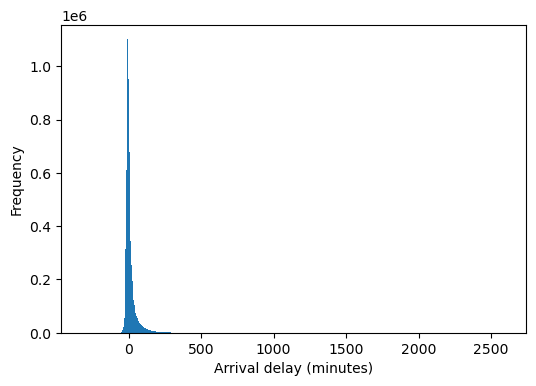

In [11]:
plot_arrival_delay_histogram(flight_2000s, 'ArrDelay', 5, 5, 5, [6, 4])

- We can see there's a long tail in the distribution showing how it is more compact and concentrated with the specifications. I'll autoscale by setting the x axis range using x_lim argument to view the data better.

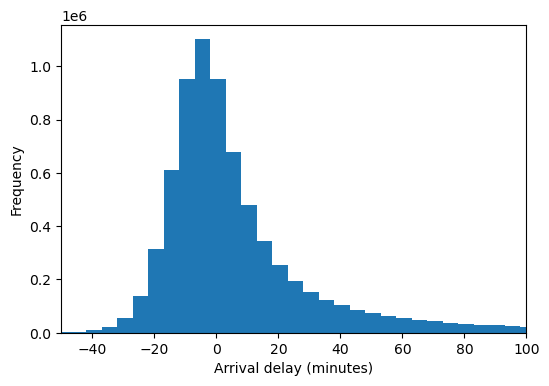

In [12]:
plot_arrival_delay_histogram(flight_2000s, 'ArrDelay', 5, 5, 5, [6, 4], x_lim=(-50,100))

- Given the maximum value is 2598 and minimum value is -312, we can tell with the visual that more data is concentrated between -20 and 40 minutes. This shows the arrival delay variable has outliers, therefore i will check them out.

<AxesSubplot:xlabel='ArrDelay'>

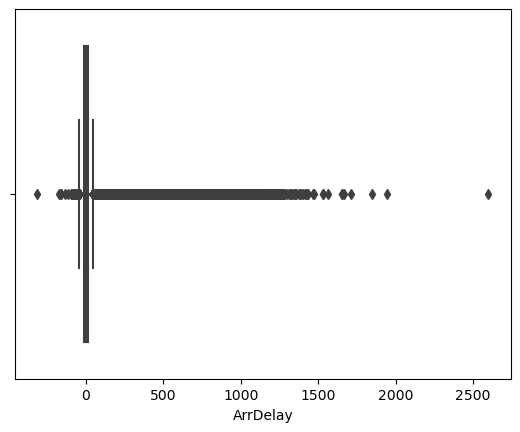

In [13]:
#plot the statistics
sns.boxplot(x=flight_2000s['ArrDelay'])

In [14]:
#px.box(data_frame=flight_2000s,x='ArrDelay')

In [15]:
#Check Outliers

def traditional_outlier(df,x):
    q1  =  df[x].quantile(.25)
    q3  =  df[x].quantile(.75)
    iqr = q3-q1
    df['Traditional']  = np.where(df[[x]]<(q1-1.5*iqr),-1,
                         np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    return df

In [16]:
traditional_outlier(flight_2000s,'ArrDelay')

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Traditional
0,2007-01-01 00:00:00+00:00,1,1,Monday,1232,1225,1341,1340,WN,54.0,1.0,7.0,SMF,ONT,0,NaN,0,0,389,0,0,0,0,1
1,2007-01-01 00:00:00+00:00,1,1,Monday,1918,1905,2043,2035,WN,74.0,8.0,13.0,SMF,PDX,0,NaN,0,0,479,0,0,0,0,1
2,2007-01-01 00:00:00+00:00,1,1,Monday,2206,2130,2334,2300,WN,73.0,34.0,36.0,SMF,PDX,0,NaN,0,3,479,0,0,0,31,1
3,2007-01-01 00:00:00+00:00,1,1,Monday,1230,1200,1356,1330,WN,75.0,26.0,30.0,SMF,PDX,0,NaN,0,23,479,0,0,0,3,1
4,2007-01-01 00:00:00+00:00,1,1,Monday,831,830,957,1000,WN,74.0,-3.0,1.0,SMF,PDX,0,NaN,0,0,479,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275256,2007-12-15 00:00:00+00:00,12,15,Saturday,1558,1605,1749,1736,DL,80.0,13.0,-7.0,MCO,ATL,0,NaN,0,0,403,0,0,0,0,1
7275257,2007-12-15 00:00:00+00:00,12,15,Saturday,1902,1851,2110,2105,DL,221.0,5.0,11.0,ATL,SLC,0,NaN,0,0,1589,0,0,0,0,1
7275258,2007-12-15 00:00:00+00:00,12,15,Saturday,1024,1025,1750,1735,DL,233.0,15.0,-1.0,LAX,ATL,0,NaN,0,0,1946,0,15,0,0,1
7275259,2007-12-15 00:00:00+00:00,12,15,Saturday,1353,1315,1658,1622,DL,100.0,36.0,38.0,DFW,ATL,0,NaN,0,0,732,0,0,0,36,1


In [17]:
#Outlier count
flight_2000s['Traditional'].value_counts()

 1    6587905
-1     687356
Name: Traditional, dtype: int64

In [18]:
#Removing outliers

flights_no_outliers = flight_2000s[flight_2000s.Traditional != -1]
#flights

- Flights_no_outliers is the new dataframe which has no outliers, but i will use the original dataset for my analysis and for visualisation exclude the outliers with showfliers as False argument.

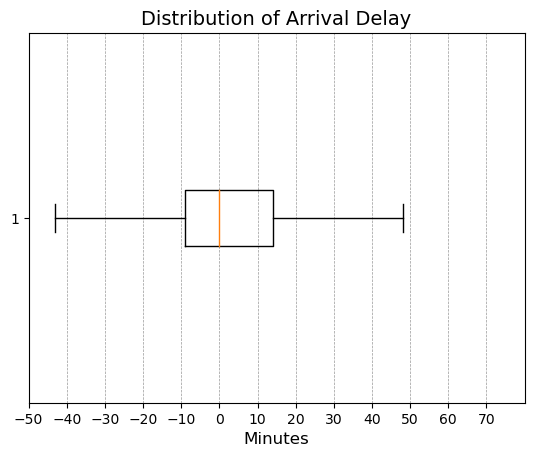

In [142]:
#Plotting boxplot with no outliers
plt.boxplot(x=flight_2000s[pd.notnull(flight_2000s.ArrDelay)].ArrDelay, vert=False, showfliers=False)
step = 10
x_min, x_max = -50, 80
plt.xlabel('Minutes', fontsize=12)
#plt.ylabel('', fontsize=12)
plt.title('Distribution of Arrival Delay', fontsize=14)
plt.grid(axis='x', color='#999999', linestyle = '--', linewidth = 0.5)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

**Observation**

- There are delayed arrivals as well as earlier arrivals and the most of arrival delays are between -42 to 48 min differ of the scheduled time.

## Arrival and Departure Time

**What are the favoured hour of arrival and departure? How does it compair to the 90s?**

In [19]:
flight_2000s.ArrTime.value_counts()

1230    9145
1630    9104
1620    9072
1030    8959
1625    8953
        ... 
358       49
356       48
404       43
357       39
409       36
Name: ArrTime, Length: 1440, dtype: int64

In [20]:
#Function to plot barplot

def flight_hour(data,column,title):
    # Creating flight_hour
    flight_hour = data[column]
    # Creating a new dataframe
    flight_hour = pd.DataFrame(flight_hour)

    # Extracting the hour from the times

    flight_hour['FlightHour'] = data[column].astype(str).str[:2]
    flight_hour['FlightHour'] = flight_hour['FlightHour'].astype('int')

    #Rectifying hours greater than 24
    flight_hour.loc[flight_hour['FlightHour'] > 24, "FlightHour"] = data[column].astype(str).str[:1]
    
    #plot barplot
    flight_hour['FlightHour'].value_counts().plot(kind='bar')
    plt.xlabel('Time in 24 Hours', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=16)
    plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
    plt.xticks(rotation=360)

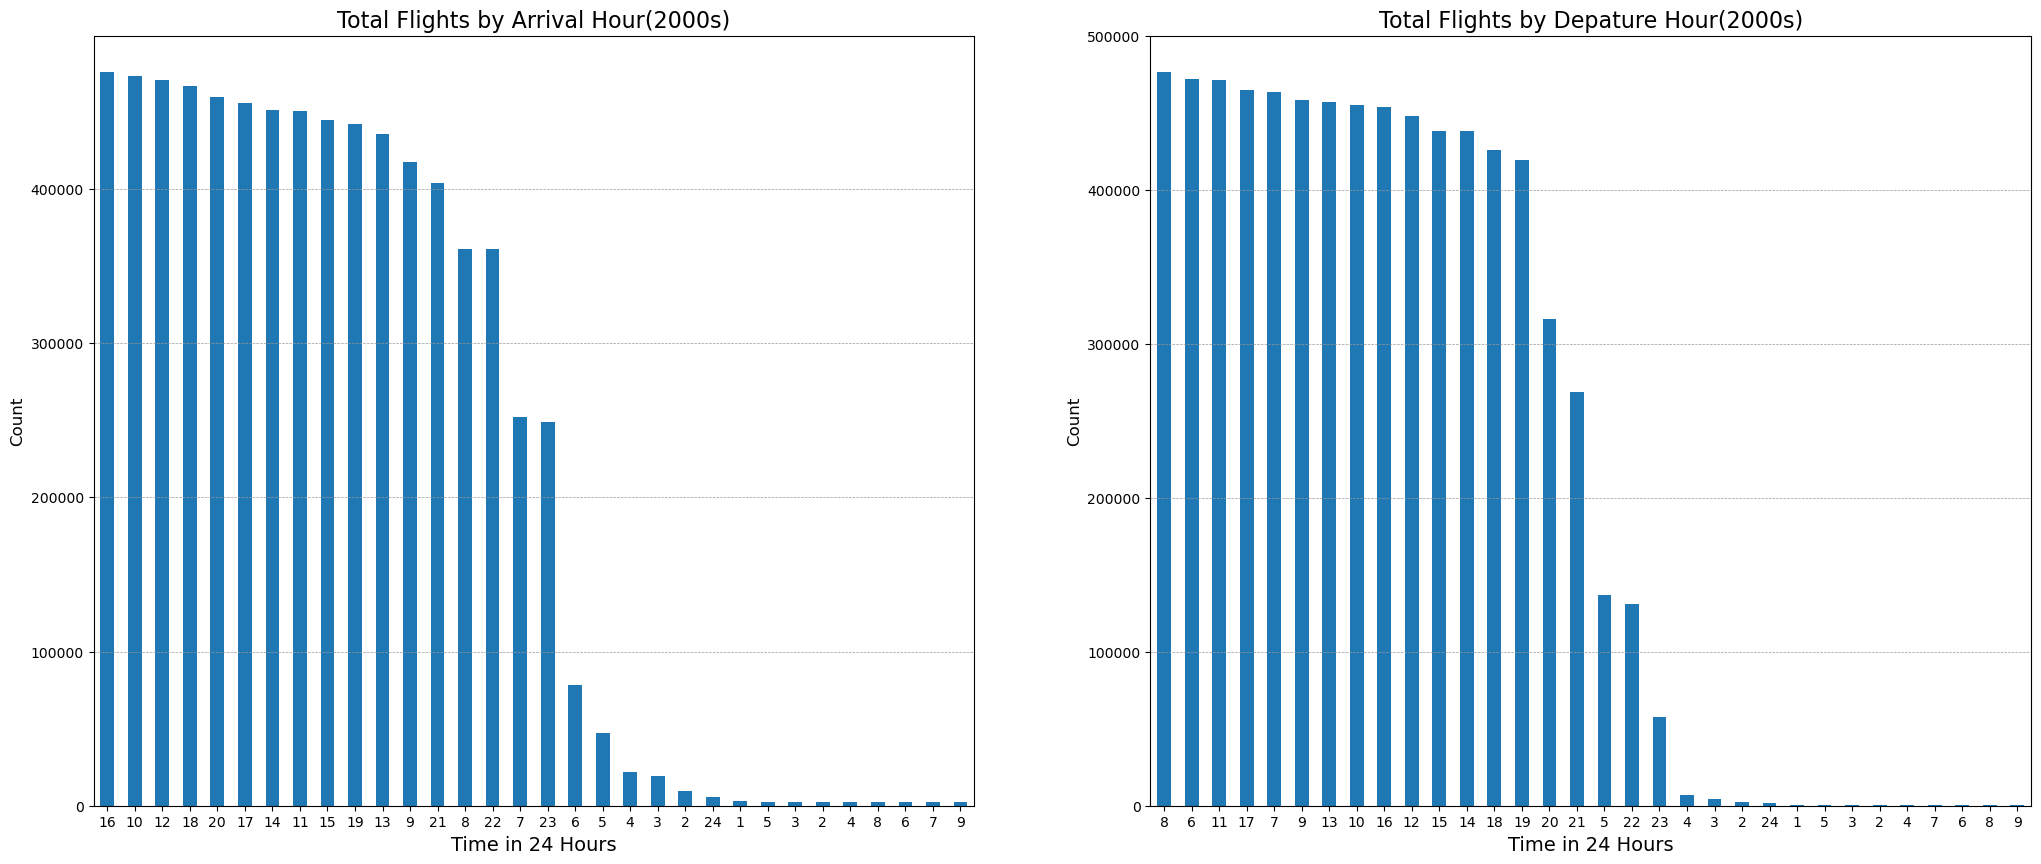

In [21]:
#2000s
plt.figure(figsize=[25, 10]) #width,height
plt.subplot(1,2,1)
flight_hour(flight_2000s,'ArrTime','Total Flights by Arrival Hour(2000s)')

plt.subplot(1,2,2)
flight_hour(flight_2000s, 'DepTime','Total Flights by Depature Hour(2000s)')


- We can see from 6am to 10pm are the most favoured time for travel with 4 pm for arrival and 8am for departure prefered in the 2000s.

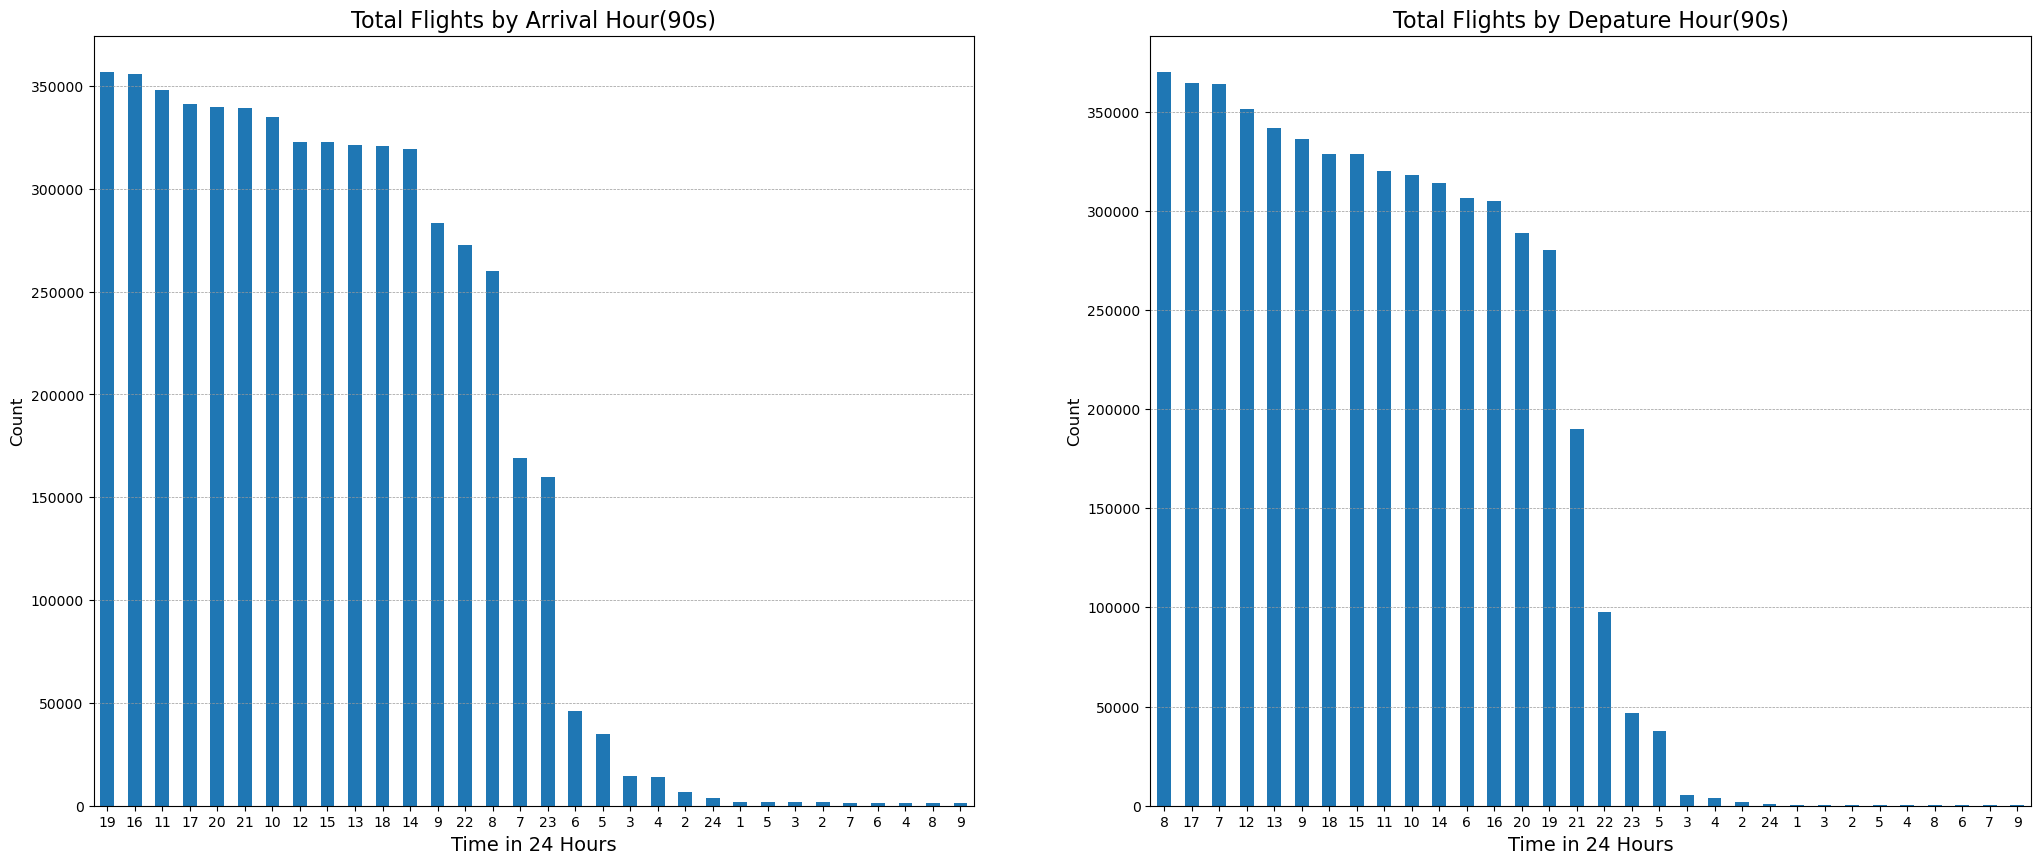

In [22]:
#90s 
plt.figure(figsize=[25, 10]) #width,height
plt.subplot(1,2,1)
flight_hour(flight_90s,'ArrTime','Total Flights by Arrival Hour(90s)')

plt.subplot(1,2,2)
flight_hour(flight_90s, 'DepTime','Total Flights by Depature Hour(90s)')

- We can see from 6am to 10pm are the most favoured time for travel with 7pm for arrival and 8am for departure prefered in the 90s. This shows not much change after a decade.

## Airline Distribution

**Which airlines have the most flights? How does it compaire to the 90s?**

In [23]:
# Function to get airlines names from their codes in UniqueCarrier column 
df = pd.read_csv('carriers.csv')
def map_carrier_codes(codes):
    """ Convert list of carrier codes to carrier names. """
    return list(map(lambda x: df.loc[df.Code==x].Description.to_string(index=False), codes))

WN    1156958
AA     613836
OO     582871
MQ     516205
UA     477090
US     475583
DL     468323
XE     422305
NW     405872
CO     319138
YV     282585
EV     276617
FL     259869
9E     250186
OH     224471
B6     187116
AS     157123
F9      97221
HA      55935
AQ      45957
Name: UniqueCarrier, dtype: int64


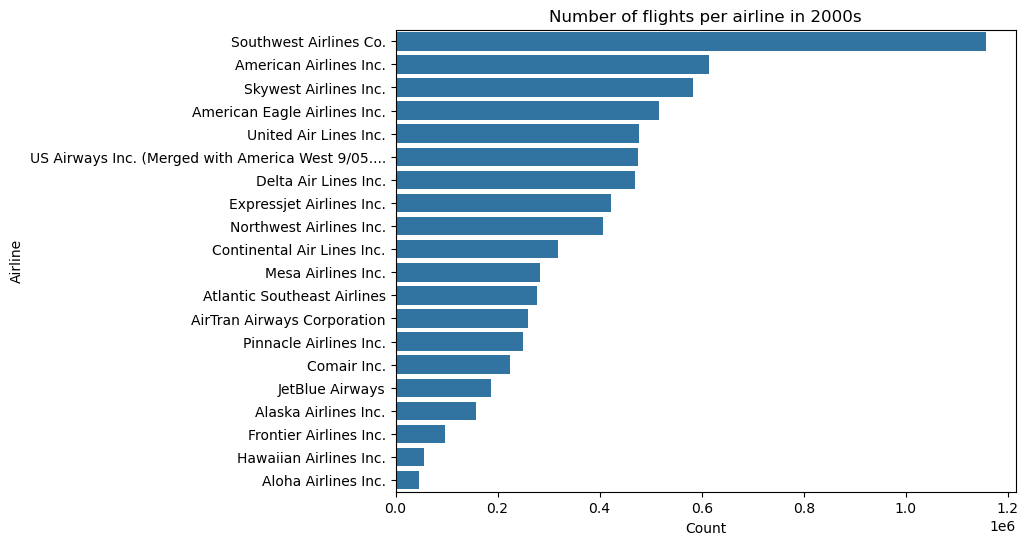

In [24]:
#Plot for th 2000s
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 

base_color = sns.color_palette()[0]
plt.figure(figsize = [8, 6])
carriers_order = flight_2000s.UniqueCarrier.value_counts().index
print(flight_2000s.UniqueCarrier.value_counts())

g = sns.countplot(data= flight_2000s, y='UniqueCarrier', color = base_color, order = carriers_order)
g.set_xlabel('Count')
g.set_ylabel('Airline')
g.set_title('Number of flights per airline in 2000s')
g.set_yticklabels(map_carrier_codes(carriers_order));


DL    906452
WN    784416
UA    725325
US    704520
AA    648451
NW    522252
CO    395512
TW    267649
HP    203271
AS    144151
Name: UniqueCarrier, dtype: int64


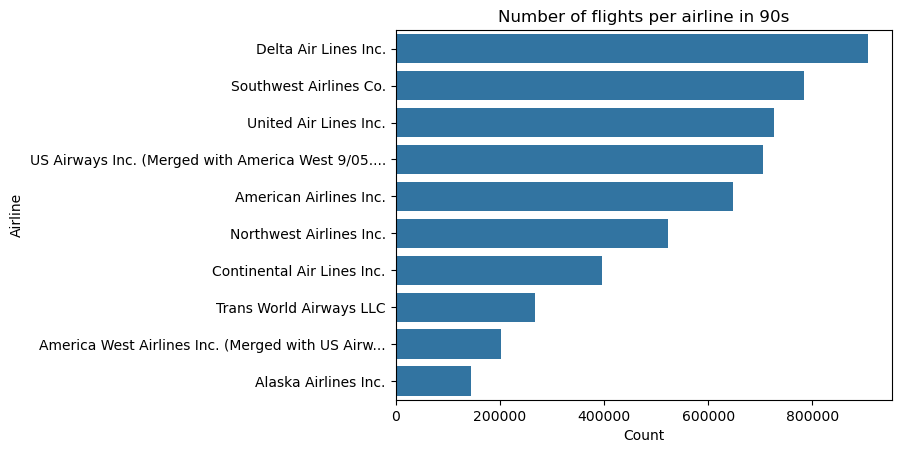

In [25]:
#Plot for the 90s

base_color = sns.color_palette()[0]
carriers_order2 = flight_90s.UniqueCarrier.value_counts().index
print(flight_90s.UniqueCarrier.value_counts())
g = sns.countplot(data= flight_90s, y='UniqueCarrier', color = base_color, order = carriers_order2)
g.set_xlabel('Count')
g.set_ylabel('Airline')
g.set_title('Number of flights per airline in 90s')
g.set_yticklabels(map_carrier_codes(carriers_order2));

**Observation:**

The total flights by airlines is a good indication of which airlines were the most popular in the 90s and a decade later in the 2000s. 

- Southwest Airlines tops the list with the highest volume of flight numbers in the 2000s. This is an increase from the 90s of 47%. 
- Delta Air which toped in the 90s has a reduced volume in th 2000s with a drop of 48%. Could this be atributed to high delays faced by the airline? we'll answer this question in the biviriate exploration

### Airports

1. Which airports have maximum traffic in terms of inbound and outbound flights?
2. Which routes are the most popular?

In [26]:
# Function to get airport names from their codes in Origin/Dest column 
df2 = pd.read_csv('airports.csv')
def map_airport_codes(code):
    """ Convert list of carrier codes to carrier names. """
    return list(map(lambda x: df2.loc[df2.iata==x].airport.to_string(index=False), code))

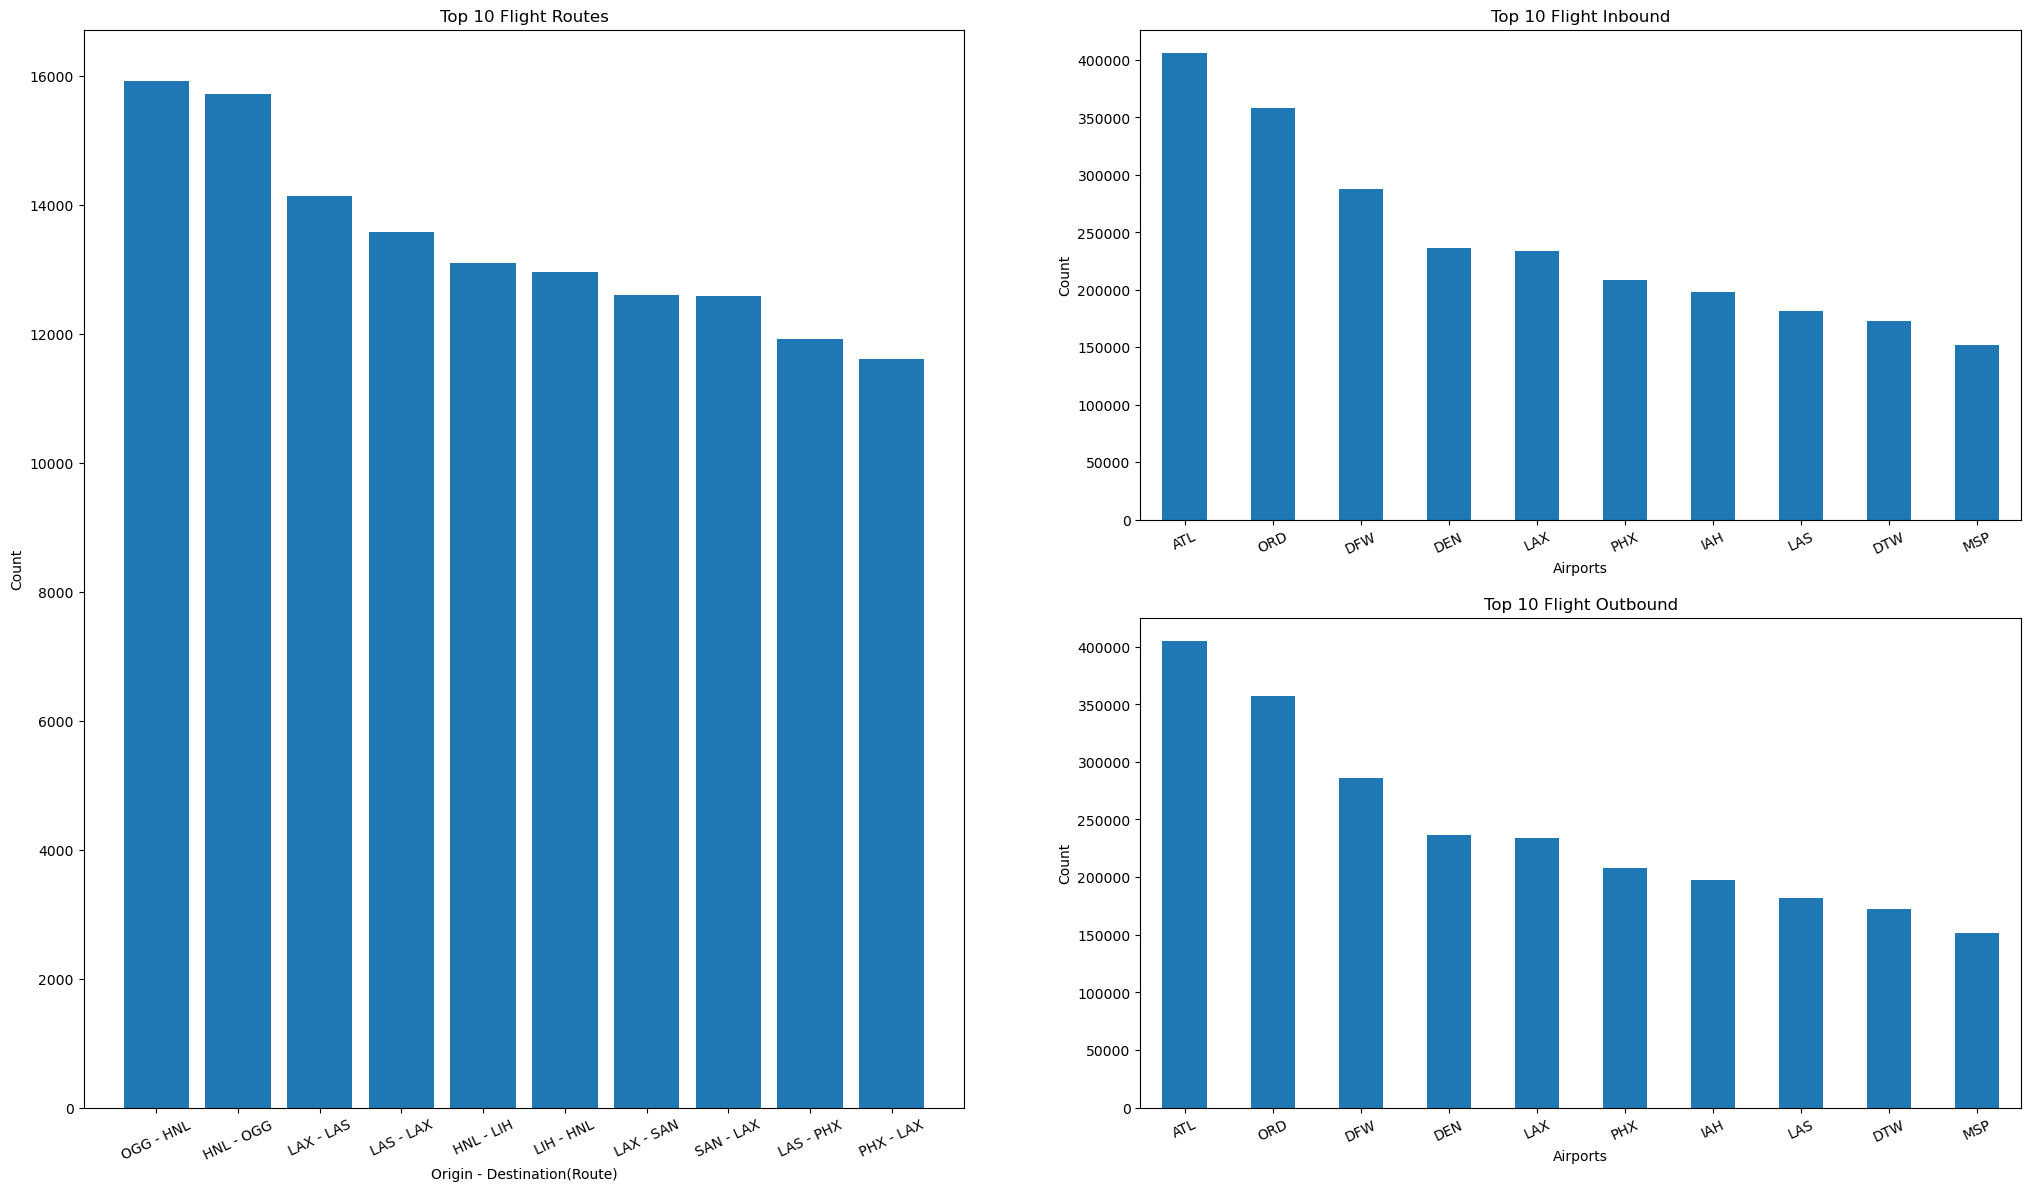

In [27]:
#Plot 3
plt.figure(figsize=[25, 14])
plt.subplot(2,2,2)
flight_2000s.Origin.value_counts().head(10).plot(kind='bar')

#Labels
plt.xlabel('Airports', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Airports Inbound Flights Traffic Analysis (Top 10)', fontsize=16)
plt.xticks(rotation=25)

#Plot 2
plt.subplot(2,2,4)
flight_2000s.Dest.value_counts().head(10).plot(kind='bar')
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airports Outbound Flight Traffic Analysis (Top 10)', fontsize=16)
plt.xticks(rotation=25)

#Plot 1
plt.subplot(1,2,1)
#Create a dataframe so as to join Origin and Destination
top_origin_dest = pd.DataFrame({'Count' : flight_2000s.groupby(["Origin","Dest"] ).size()})\
                                .reset_index().sort_values('Count', ascending=False).head(10)
#Merge and drop Columns
top_origin_dest['Origin - Destination'] = top_origin_dest['Origin'].str.cat(top_origin_dest['Dest'],sep=" - ")
top_origin_dest = top_origin_dest[['Origin - Destination', 'Count']]

#Plot
plt.bar(top_origin_dest['Origin - Destination'],top_origin_dest['Count'] )
plt.xlabel('Routes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Maximum Traffic Flight Routes (Top 10)', fontsize=16)
plt.xticks(rotation=25);

In [146]:
#Checking the bottom ten airports and routes

least_airports = pd.DataFrame({'Inbound' :flight_2000s.Origin.value_counts().tail(10),
                               'Outbound': flight_2000s.Dest.value_counts().tail(10)})
least_routes = pd.DataFrame({'Count' : flight_2000s.groupby(["Origin","Dest"] ).size()})\
                                .reset_index().sort_values('Count', ascending=False).tail(10)

print('Bottom 10 airports: \n', least_airports,'\n')
print('Bottom 10 Routes: \n', least_routes)


Bottom 10 airports: 
      Inbound  Outbound
DLG      171       171
MTH      126       124
BJI      114       114
ADK       89        97
GST       86        88
EAU       66        65
ISO        8         7
PIR        4         3
GLH        2         2
MKC        1         1 

Bottom 10 Routes: 
      Origin Dest  Count
4075    RDU  CHS      1
4046    PWM  BGR      1
3136    MKC  MKE      1
57      ACY  BWI      1
3151    MKE  MCI      1
4026    PVD  BOS      1
61      ACY  MYR      1
1851    FWA  CVG      1
3155    MKE  MKC      1
4680    SMF  CVG      1


In [29]:
#Get airport names using function
airport_names = flight_2000s.Origin.value_counts().head(10).index.tolist() + least_airports.index.tolist()
airport_names1 = pd.DataFrame({'Code' : airport_names,
                              'Name': map_airport_codes(airport_names)})


#get route names using function
routes = ['LAS','LAX','HNL','OGG','LIH','SAN','PHX']

route_names = pd.DataFrame({'Code' : routes,
                            'Name': map_airport_codes(routes)})
route_names

print(airport_names1,'\n')
print(route_names)


   Code                                 Name
0   ATL    William B Hartsfield-Atlanta Intl
1   ORD         Chicago O'Hare International
2   DFW      Dallas-Fort Worth International
3   DEN                          Denver Intl
4   LAX            Los Angeles International
5   PHX     Phoenix Sky Harbor International
6   IAH         George Bush Intercontinental
7   LAS               McCarran International
8   DTW    Detroit Metropolitan-Wayne County
9   MSP             Minneapolis-St Paul Intl
10  DLG                           Dillingham
11  MTH                Florida Keys Marathon
12  BJI              Bemidji-Beltrami County
13  ADK                                 Adak
14  GST                             Gustavus
15  EAU             Chippewa Valley Regional
16  ISO  Kinston Regional Jetport At Stallin
17  PIR                      Pierre Regional
18  GLH                   Mid Delta Regional
19  MKC                             Downtown 

  Code                                Name
0  LAS    

**Observation**

- We can see that Atlanta Intl(ATL) Airport has the highest inbound and outbound traffic while Kahului(OGG) - Honolulu International(HNL) route is the highest travelled. 

- Downtown (MKC) Airport experiences the least inbound and outbound traffic while for the routes, the bottom ten routes all experience the same number of traffic, making them the least travelled routes. 

- I will expound more and check their correlation to arrival delay in the bivariate exploitation.

- The number of incoming and outgoing flights are roughly equal and will therefore just use the Origin column henseforth.

### Dates exploration
    
**Are there any abnormalities in month, day, day of week distributions?**

1. When is the popular day of week/date and month of the year to fly? 
2. What time of the week do passengers fly the most?
3. How does season change the frequency of travel?

In [30]:
#plot function

def dates_distribution(data,column):
    plt.figure(figsize = [8, 3])
    base_color = sns.color_palette()[0]
    sns.countplot(data=data, x=column, color=base_color)

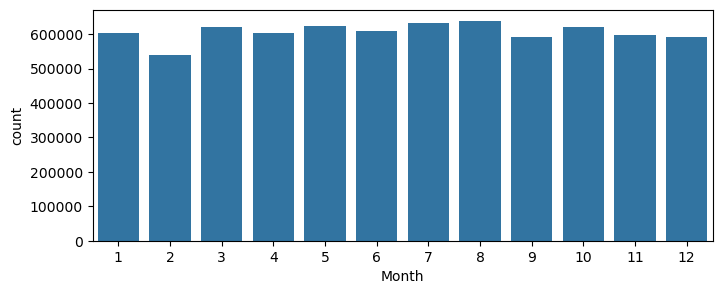

In [31]:
dates_distribution(flight_2000s, 'Month')

**Observation**

- Month 7 and 8 of summer season seem to highly prefered time for travel with the 2nd month(February) and 12th Month(December) of winter season being the least prefered. 

- i'll group them into seasons so as to confirm which season of the year has the highest volume of travel travel and which season has the least.

In [32]:
#Grouping into seasons

month_by_season = pd.DataFrame({ 'Count': flight_2000s.groupby(['Month']).size()}).reset_index()
#month_by_season
flights_by_season = month_by_season.rename(index={0: 'Winter', 1: 'Winter', 2: 'Spring', 3: 'Spring', 4: 'Spring', 5: 'Summer', 6: 'Summer', 7: 'Summer', 8: 'Autumn', 9: 'Autumn', 10: 'Autumn', 11: 'Winter'})
 
#flights_by_season

# Drop 'Month' column
flights_by_season.drop(columns=['Month'], axis=1, inplace=True)

# Group seasons
flights_by_season.reset_index(inplace=True)
flights_by_season.rename(columns={'index':'Season'}, inplace=True)
flights_by_season = flights_by_season.groupby('Season').sum()

# Looking at the dataframe we created
flights_by_season.sort_values('Count', ascending=False)

,Count
Season,
Summer,1881606
Spring,1846700
Autumn,1812368
Winter,1734587


**Observation:**

- This confirms Summer season has the highest volume of air traffic and winter has the least volume. 
- Does high volume correlate with high delays? i'll tackle this in the bivariate explosion

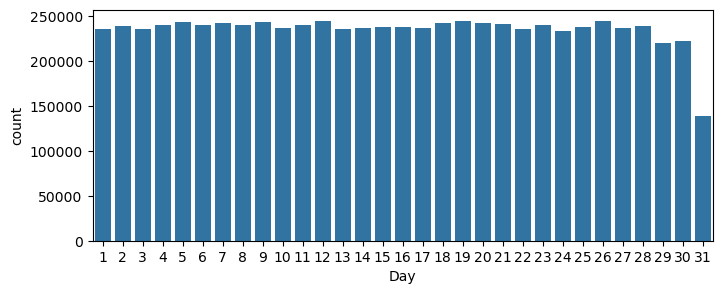

In [33]:
dates_distribution(flight_2000s, 'Day')

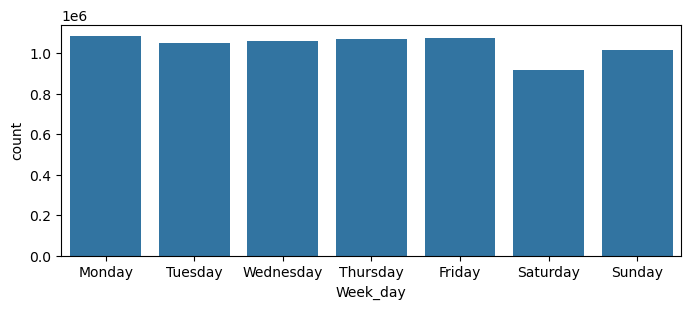

In [34]:
dates_distribution(flight_2000s, 'Week_day')

**Observations:**

- passengers are flying more during the week than weekends with Monday proving to be the most prefered day followed by Thursday and Friday.

### Distance

**How does the Distace distribution look like?**

In [35]:

print("Distance Statistics 2000s")
print("Max: ", flight_2000s['Distance'].max())
print("Min: ", flight_2000s['Distance'].min())
print("Mean: ", flight_2000s['Distance'].mean())
print("SD: ", flight_2000s['Distance'].std())
print("Median: ", flight_2000s['Distance'].median())

Distance Statistics 2000s
Max:  4962
Min:  11
Mean:  722.4404591120511
SD:  563.7840908041387
Median:  570.0


In [36]:
flight_2000s[flight_2000s['Distance']==4962]

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Traditional
558186,2007-01-26 00:00:00+00:00,1,26,Friday,1320,1320,1922,1920,CO,628.0,2.0,0.0,EWR,HNL,0,NaN,0,0,4962,0,0,0,0,1
558699,2007-01-11 00:00:00+00:00,1,11,Thursday,2231,2245,1234,1310,CO,517.0,-36.0,-14.0,HNL,EWR,0,NaN,0,0,4962,0,0,0,0,1
559529,2007-01-12 00:00:00+00:00,1,12,Friday,2240,2245,1306,1310,CO,540.0,-4.0,-5.0,HNL,EWR,0,NaN,0,0,4962,0,0,0,0,1
559744,2007-01-04 00:00:00+00:00,1,4,Thursday,2234,2245,1225,1310,CO,500.0,-45.0,-11.0,HNL,EWR,0,NaN,0,0,4962,0,0,0,0,-1
559761,2007-01-09 00:00:00+00:00,1,9,Tuesday,2237,2245,1252,1310,CO,530.0,-18.0,-8.0,HNL,EWR,0,NaN,0,0,4962,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256229,2007-12-15 00:00:00+00:00,12,15,Saturday,2243,2245,1341,1310,CO,559.0,31.0,-2.0,HNL,EWR,0,NaN,0,0,4962,0,31,0,0,1
7256377,2007-12-10 00:00:00+00:00,12,10,Monday,1429,1320,2011,1920,CO,614.0,51.0,69.0,EWR,HNL,0,NaN,0,51,4962,0,0,0,0,-1
7256984,2007-12-13 00:00:00+00:00,12,13,Thursday,1353,1320,2249,1920,CO,629.0,209.0,33.0,EWR,HNL,0,NaN,0,0,4962,33,176,0,0,-1
7257179,2007-12-18 00:00:00+00:00,12,18,Tuesday,1335,1320,1941,1920,CO,633.0,21.0,15.0,EWR,HNL,0,NaN,0,15,4962,0,6,0,0,1


We can see that EWR - Honolulu International (HNL) route experiences the longest distance of 4962 minutes

In [37]:
flight_2000s[flight_2000s['Distance']==11]

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Traditional
167851,2007-01-26 00:00:00+00:00,1,26,Friday,1120,857,1155,957,OH,11.0,118.0,143.0,JFK,LGA,0,NaN,0,118,11,0,0,0,0,-1
1305786,2007-03-07 00:00:00+00:00,3,7,Wednesday,1112,955,1254,1055,OH,20.0,119.0,77.0,JFK,LGA,0,NaN,0,77,11,0,42,0,0,-1
1309817,2007-03-13 00:00:00+00:00,3,13,Tuesday,1430,1410,1558,1510,OH,23.0,48.0,20.0,JFK,LGA,0,NaN,0,0,11,20,28,0,0,1
3574812,2007-06-06 00:00:00+00:00,6,6,Wednesday,2215,2215,2258,2245,CO,15.0,13.0,0.0,SFO,OAK,0,NaN,0,0,11,0,0,0,0,1
3780284,2007-07-31 00:00:00+00:00,7,31,Tuesday,1050,1010,1137,1110,OH,16.0,27.0,40.0,JFK,LGA,0,NaN,0,27,11,0,0,0,0,1
6240533,2007-11-08 00:00:00+00:00,11,8,Thursday,2040,1935,2215,2035,OH,9.0,100.0,65.0,JFK,LGA,0,NaN,0,65,11,0,35,0,0,-1
6845184,2007-12-18 00:00:00+00:00,12,18,Tuesday,1118,1040,1230,1140,OH,21.0,50.0,38.0,JFK,LGA,0,NaN,0,38,11,0,12,0,0,-1


We can see that JFK - LGA route experiences the shortest distance of 11 minutes

In [38]:
#histogram of distance

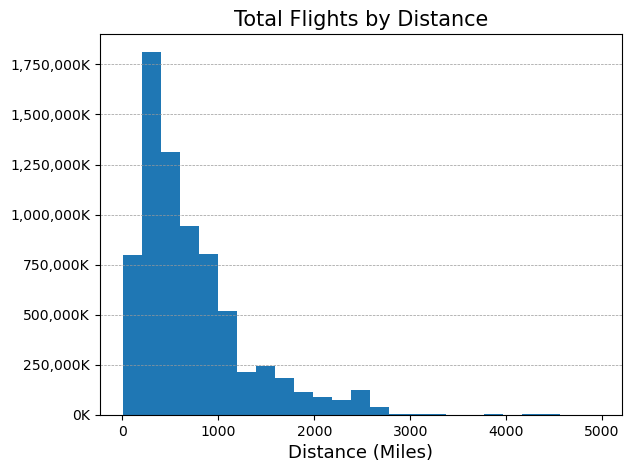

In [39]:
# Plot
plt.hist(data = flight_2000s, x = 'Distance', bins = 25) #, y = 'Flights'

# Set title label
plt.title('Total Flights by Distance', fontsize = 15)

# Set axis labels
plt.ylabel('', fontsize = 13)
plt.xlabel('Distance (Miles)', fontsize = 13)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)

# Ticks fixed for histogram
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1) + 'K'))

# Show
plt.tight_layout(pad=1)
#plt.savefig('images/charts/total_flights_by_distance.png')
plt.show()

**Observation**

- Most flights fall in the range of 11 miles and 1200 miles.

### Reason for delay

**How does the delay reasons distribution look like?**

In [40]:
reasons = flight_2000s[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
reasons.isnull().sum()

CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

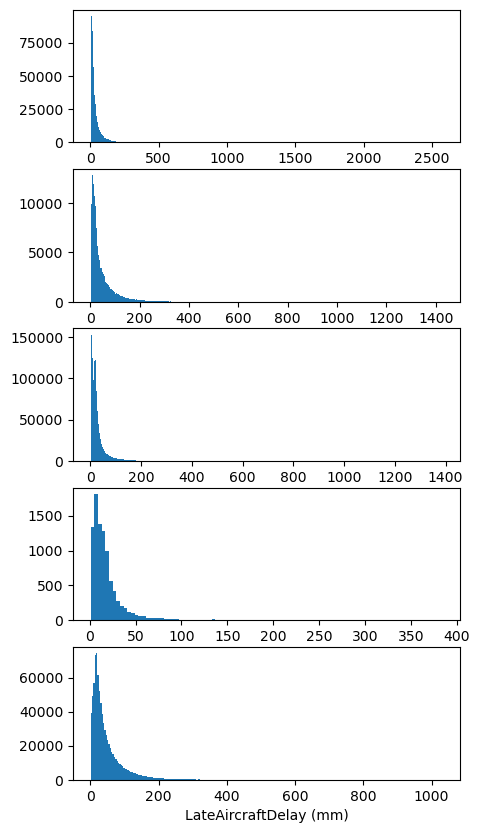

In [41]:
# The airlines report the causes of delays since June 2003, so there is less data about these features

fig, ax = plt.subplots(nrows=5, figsize = [5,10])
binsize = 4
base_color = sns.color_palette()[0]
reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for i in range(len(reasons)):
    var = reasons[i]
    bins = np.arange(1, flight_2000s[var].max()+binsize, binsize)
    ax[i].hist(data = flight_2000s[flight_2000s[var].notnull()], x = var, color=base_color, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The arrival delay distribution looks unimodal, right skewed when plotted, with most delays within 1-40 minutes. Given the maximum value is 2598 and minimum value is -312, we can tell there are outliers, so I considered dropping rows with outliers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Rather suprisingly, the average delay is only 10 minutes in the 2000s. Moreover, we can see that the median value is 0 minutes, suggesting the majority of flights actually arrive earlier than their expected time of arrival. I'll analyse more in bivariate 

- SecurityDelay reason turned out to have less values, will not drop these rows because they have other features of interest but will exclude them from exploration. 

## Bivariate Exploration


### Airline

**How is the extent of delay distributed among flights?**

In [42]:
#Function that classifies delay into 5 sections
def classify(num):
  if (num < 0):
    if (num < -30):
      return ('Early: > 30 mins') 
    else:
      return ('Early: < 30 mins')
  else:
    if (num < 30):
      return ('Late: < 30 mins')
    elif (num < 250):
      return ('Late: < 5 hours')
    else:
      return ('Late: > 5 hours')

#Creating new column for delay group
group_arr_df = flight_2000s[['Origin', 'Dest', 'ArrDelay']]
group_arr_df['Delay Amount'] = group_arr_df['ArrDelay'].apply(lambda x: classify(x))

In [133]:
def pie_chart(data, title):
    
    #Creating new column for delay group
    group_arr_df = data[['Origin', 'Dest', 'ArrDelay']]
    group_arr_df['Delay Amount'] = group_arr_df['ArrDelay'].apply(lambda x: classify(x))
        
    group_arr_count = pd.DataFrame({'Count' : group_arr_df.groupby([ "Delay Amount"] ).size()}).reset_index()

    total = group_arr_count['Count'].sum()
    group_arr_count['Percent'] = group_arr_count['Count'].apply(lambda x: (x / total) * 100) 
    group_arr_count.sort_values('Count', ascending=True)

    # Pie chart
    labels = group_arr_count['Delay Amount']
    sizes = group_arr_count['Percent']
    explode = (0.05,0.05,0.05,0.05, 0.5)


    fig1, ax1 = plt.subplots(figsize=(5, 5))
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.legend(wedges, labels,
          title="Delay Amount",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()

    plt.setp(texts, size=8, weight="bold")

    ax1.set_title(title)

    plt.show()

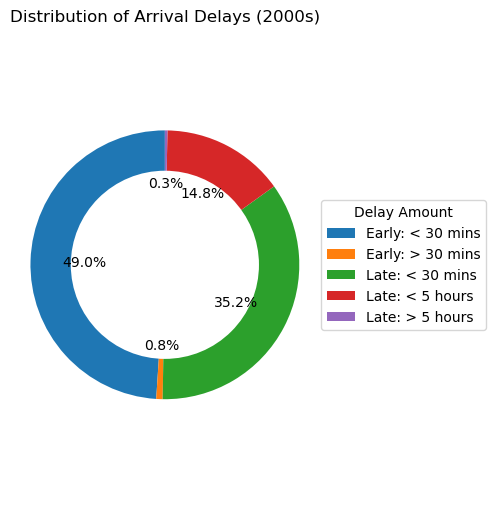

In [100]:
#Plotting Pie Chart for 2000s
pie_chart(flight_2000s, "Distribution of Arrival Delays (2000s)")

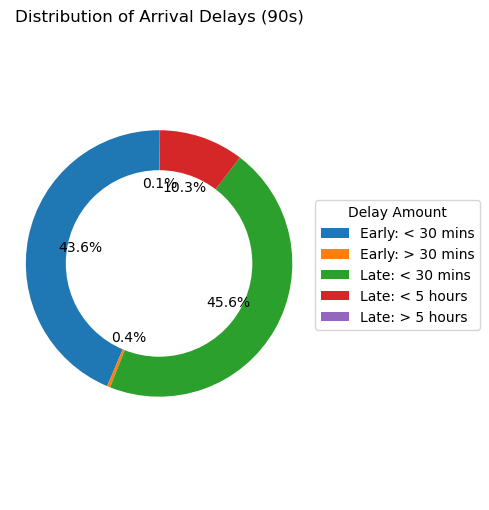

In [101]:
#Plotting Pie Chart for 90s
pie_chart(flight_90s, "Distribution of Arrival Delays (90s)")

**Observation**
1. 2000s

As shown, 49% of flights arrive early and only 15% of flights arrive more than 30 minutes late and 35% less than 30 minutes late. This came to be very surprising to me as the vast majority of flights arrive ahead of schedule. Moreover, only around 15% of flights are late by more than 30 minutes, which is far fewer than I personally expected.

2. 90s

44% of flights in the 90s arrive early and 10% of flights arrive more than 30 minutes late and 46% arrive less than 30 minutes late. 

3. Comparison

Flights have improved after a decade by both early arrival and late arrival of less than 30 minutes. Their is a 5% increase in early arrivals and 11% decrease in late arrivals of less than 30 minutes. However, their is a 5% increase of late arrivals of more than 30 minutes which is a concern.


**What is the relationship between Arrival delay and Airline?**

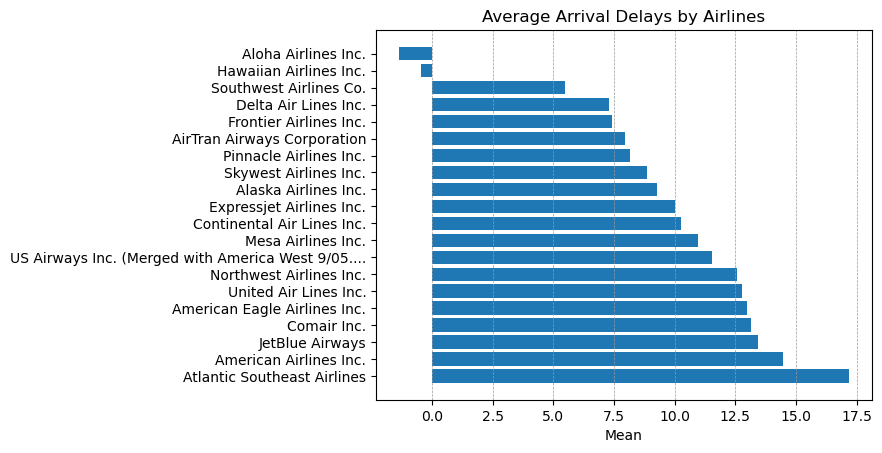

In [49]:
airline_delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([ "UniqueCarrier"] )['ArrDelay'].mean()})\
                                .sort_values('avg_delay', ascending=False).reset_index()

#plt.bar(airline_delay['UniqueCarrier'],airline_delay['avg_delay'])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.barh(airline_delay['UniqueCarrier'],airline_delay['avg_delay'])
delay_airline_count = airline_delay['UniqueCarrier'] #to get the names of airline codes
ax.set_title('Average Arrival Delays by Airlines')
ax.set_xlabel('Mean')
#ax.set_ylabel()
plt.grid(axis='x', color='#999999', linestyle = '--', linewidth = 0.5)
ax.set_yticklabels(map_carrier_codes(delay_airline_count));

  **Observations**
    
    - Atlantic Southeast Airlines experiences the highest amount of arrival delays with an average of 17 min with Southwest
    Airlines experiencing the least amount of arrival delays with an average of 6 minutes. 
    
    - Aloha Airlines and Hawaiian Airlines are the only airlines with no delays as they arrive earlier than expected
    
    - Northwest Airlines being the airline with the longest delay is one of the airlines with highest average
    arrival delays of average of 13 minutes.  
    
    - Southwest and Delta Airlines the airlines with the top number of travels in 2000s and 90s respectively
    experience the least delays, with Delta airlines having higher average arrival delays than Southwest.
    This could explain why Delta Airlines droped in flight numbers.
    
    - I will look at how delay distribution is experienced in the busiessed airports.

**How is Arrival Delay distributed in the top ten busiest Airlines?**

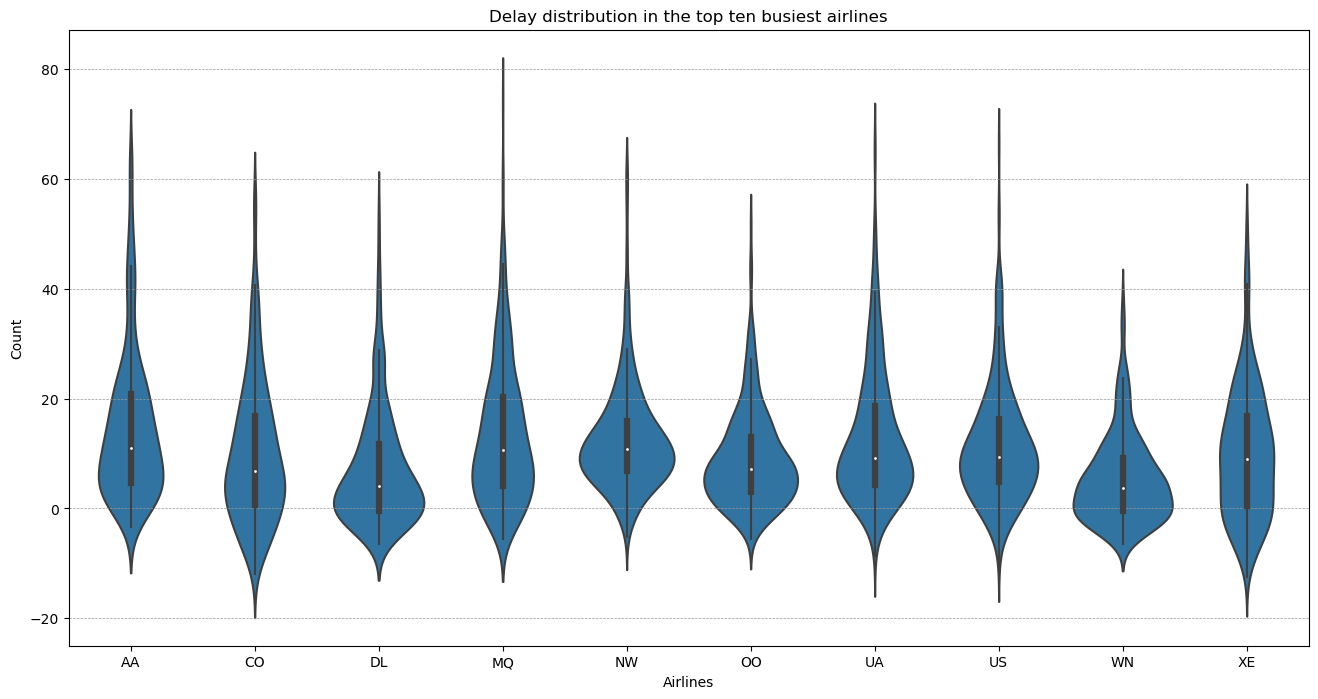

In [50]:
airlines = flight_2000s.UniqueCarrier.value_counts()[:10]
airlines_names = airlines.index.tolist()
busy_airlines = flight_2000s[flight_2000s['UniqueCarrier'].isin(airlines_names)]

busy_airlines_pivot = busy_airlines.pivot_table(index= 'date' , columns= 'UniqueCarrier', values='ArrDelay')

base_color = sns.color_palette()[0]
fig = plt.figure(figsize=[16,8])
#ax = fig.add_axes([0,0,1,1])
sns.violinplot(busy_airlines_pivot, color=base_color)
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.title('Delay distribution in the top ten busiest airlines')
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
plt.show();



   **Observation:**

    AA(American Airlines) the 2nd highest in number of flights airline has the highest delays among the top 10 
    busiest airlines followed by MQ then UA. WN(Southwest Airlines) the highest in number of flights in all airlines has
    the lowest delays among the top 10 busiest airlines followed by DL. This is in contrast with each other and shows the
    superiority of SouthWest Airlines.  
    
    OO(SkyWest Airlines) the 3rd highest in number of flights in all airlines is evenly distributed around the 
    most and least frequent delays in the top 10 busiest airlines
    
    (WM is normally distributed as the violin plot looks symmetric OO is skewed)
    All plots look skewed except for XE which looks symmetric ie normally distributed

### Airports

1. **What is the Average Arrival Delay Analysis by Airports?**
2. **What is the Average Arrival Delay Analysis by Routes?**

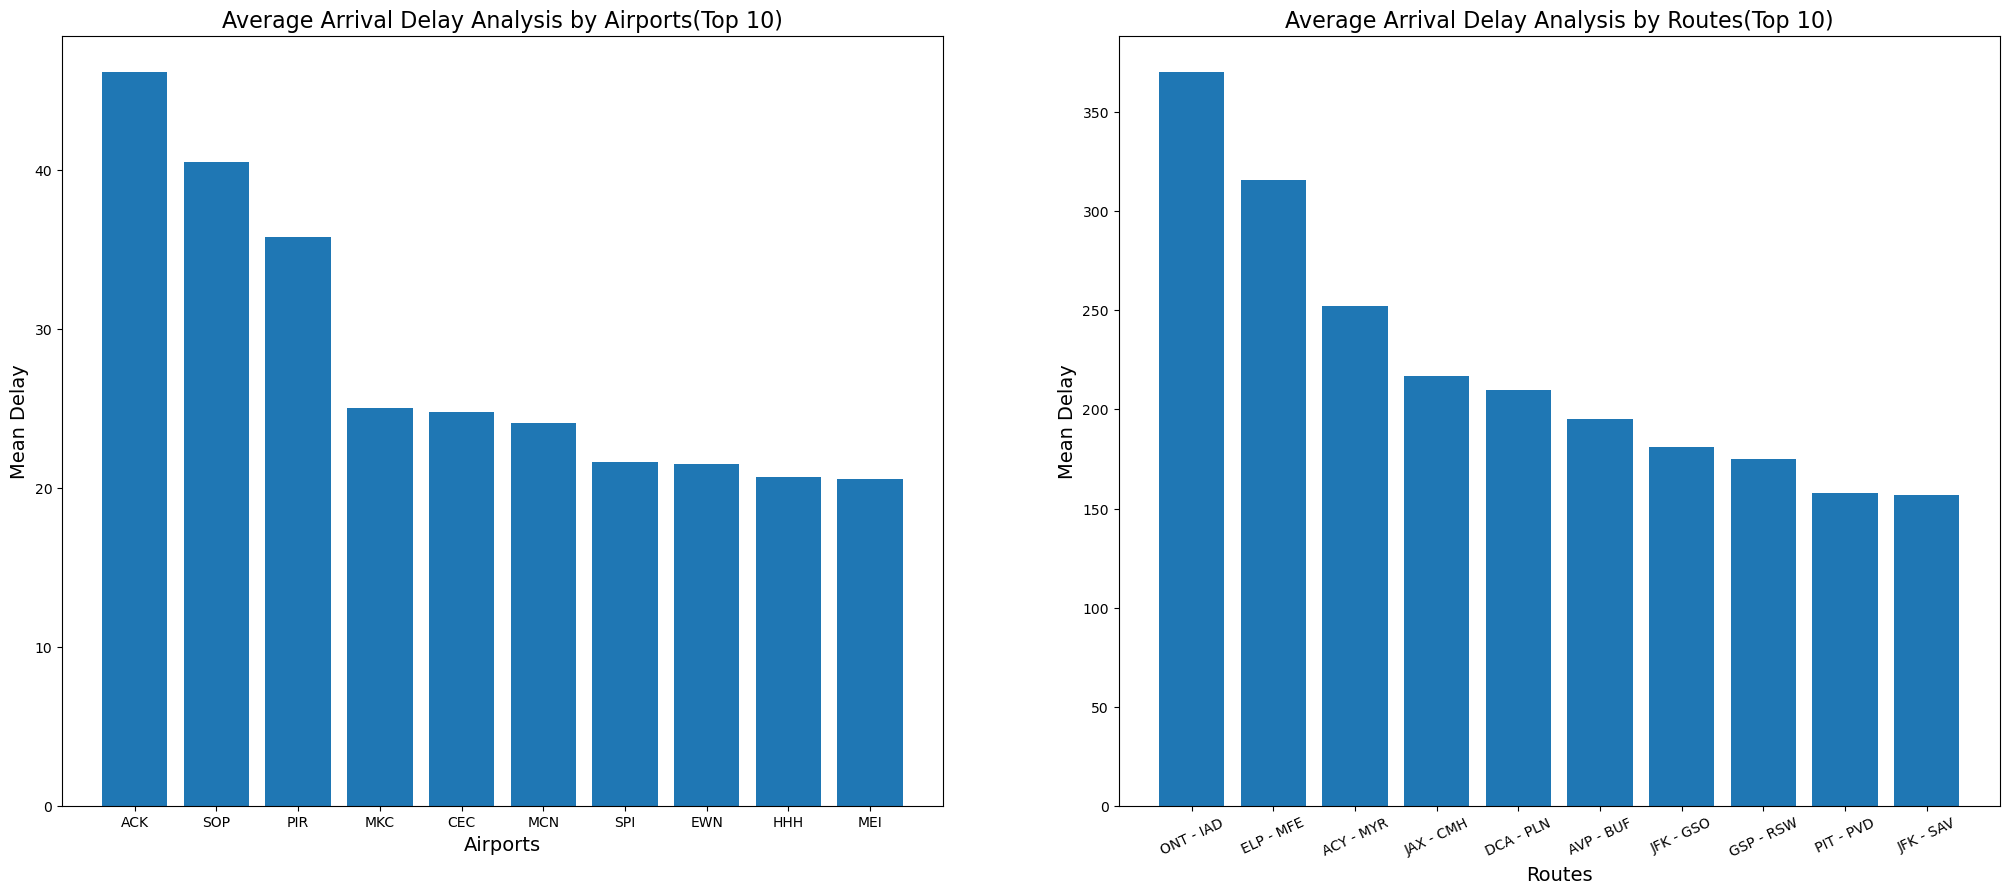

In [51]:
plt.figure(figsize=[25, 10]) #width,height
plt.subplot(1,2,1)
airport_delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([ 'Origin'] )['ArrDelay'].mean()})\
                                .sort_values('avg_delay', ascending=False).reset_index().head(10)
plt.bar(airport_delay['Origin'],airport_delay['avg_delay'] )
plt.xlabel('Airports', fontsize=14)
plt.ylabel('Mean Delay', fontsize=14)
plt.title('Average Arrival Delay Analysis by Airports(Top 10)', fontsize=16)

plt.subplot(1,2,2)
#create new dataframe for Origin - Dest and their average delay
origin_dest_delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([ 'Origin', 'Dest'] )['ArrDelay'].mean(), 
                               'count' : flight_2000s.groupby([ 'Origin', 'Dest'] ).size()})\
                                .sort_values('avg_delay', ascending=False).reset_index().head(10)

origin_dest_delay['Origin - Destination'] = origin_dest_delay['Origin'].str.cat(origin_dest_delay['Dest'],sep=" - ")
origin_dest_delay = origin_dest_delay[['Origin - Destination','avg_delay','count']]
plt.bar(origin_dest_delay['Origin - Destination'],origin_dest_delay['avg_delay'] )
plt.xlabel('Routes', fontsize=14)
plt.ylabel('Mean Delay', fontsize=14)
plt.title('Average Arrival Delay Analysis by Routes(Top 10)', fontsize=16)
plt.xticks(rotation=25);

In [52]:
#Checking the analysis of bottom ten airports and routes
bottom_airports_delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([ 'Origin'] )['ArrDelay'].mean()})\
                                .sort_values('avg_delay', ascending=False).reset_index().tail(10)

bottom_route_delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([ 'Origin', 'Dest'] )['ArrDelay'].mean(), 
                               'count' : flight_2000s.groupby([ 'Origin', 'Dest'] ).size()})\
                                .sort_values('avg_delay', ascending=False).reset_index().tail(10)

print('Bottom 10 Airport Delay analysis: \n', bottom_airports_delay,'\n')
print('Bottom 10 Route Delay analysis: \n', bottom_route_delay)

Bottom 10 Airport Delay analysis: 
     Origin  avg_delay
294    PSE  -0.713996
295    WYS  -0.726236
296    ITO  -0.933236
297    COD  -0.971648
298    SLE  -1.880711
299    BLI  -2.567986
300    TWF  -2.978365
301    IYK  -3.138151
302    PIH  -3.522890
303    ADK  -7.393258 

Bottom 10 Route Delay analysis: 
      Origin Dest  avg_delay  count
5022    LAS  BMI -19.146667     75
5023    PVD  FLL -20.527523    218
5024    PIT  CMH -21.000000      1
5025    BNA  ORF -21.400000     10
5026    TUS  OAK -22.666667     57
5027    BWI  OAK -23.018315    273
5028    MCO  PWM -24.611765     85
5029    LFT  DCA -26.000000      3
5030    ADK  ANC -30.228070     57
5031    RIC  BUF -41.000000      1


In [53]:
#Get airport names
airport_names2 = airport_delay.Origin.unique().tolist()
airport_names3 = pd.DataFrame({'Code' : airport_names2,
                              'Name': map_airport_codes(airport_names2)})


#Get route names
routes1 = ['ONT','IAD','ELP','MFE','ACY','MYR','JAX','CMH','DCA','PLN','AVP','BUF',\
           'JFK','GSO','GSP','RSW','PIT','PVD','SAV','PBI','PSE','LAS','BMI']
route_names1 = pd.DataFrame({'Code' : routes1,
                            'Name': map_airport_codes(routes1)})

print(airport_names3,'\n')
print(route_names1)


  Code                     Name
0  ACK       Nantucket Memorial
1  SOP             Moore County
2  PIR          Pierre Regional
3  MKC                 Downtown
4  CEC           Jack McNamara 
5  MCN  Middle Georgia Regional
6  SPI                  Capital
7  EWN   Craven County Regional
8  HHH              Hilton Head
9  MEI                     Key  

   Code                                Name
0   ONT               Ontario International
1   IAD     Washington Dulles International
2   ELP               El Paso International
3   MFE        McAllen Miller International
4   ACY         Atlantic City International
5   MYR          Myrtle Beach International
6   JAX          Jacksonville International
7   CMH                  Port Columbus Intl
8   DCA   Ronald Reagan Washington National
9   PLN  Pellston Regional  of Emmet County
10  AVP          Wilkes-Barre/Scranton Intl
11  BUF                Buffalo Niagara Intl
12  JFK                 John F Kennedy Intl
13  GSO        Piedmont Triad 

   **Observation:**

   
    . Nantucket Memorial(ACK) airport experiences the highest delays while Mercedita (PSE) Airport experiences the 
    least delays
    
    . Ontario International(ONT) to Washington Dulles International(IAD) route experiences the highest delays while
    McCarran International (LAS) Airport to Central Illinois Regional(BMI) Airport experiences the least delays.

**How is Arrival Delay distributed in the busiest airports?**

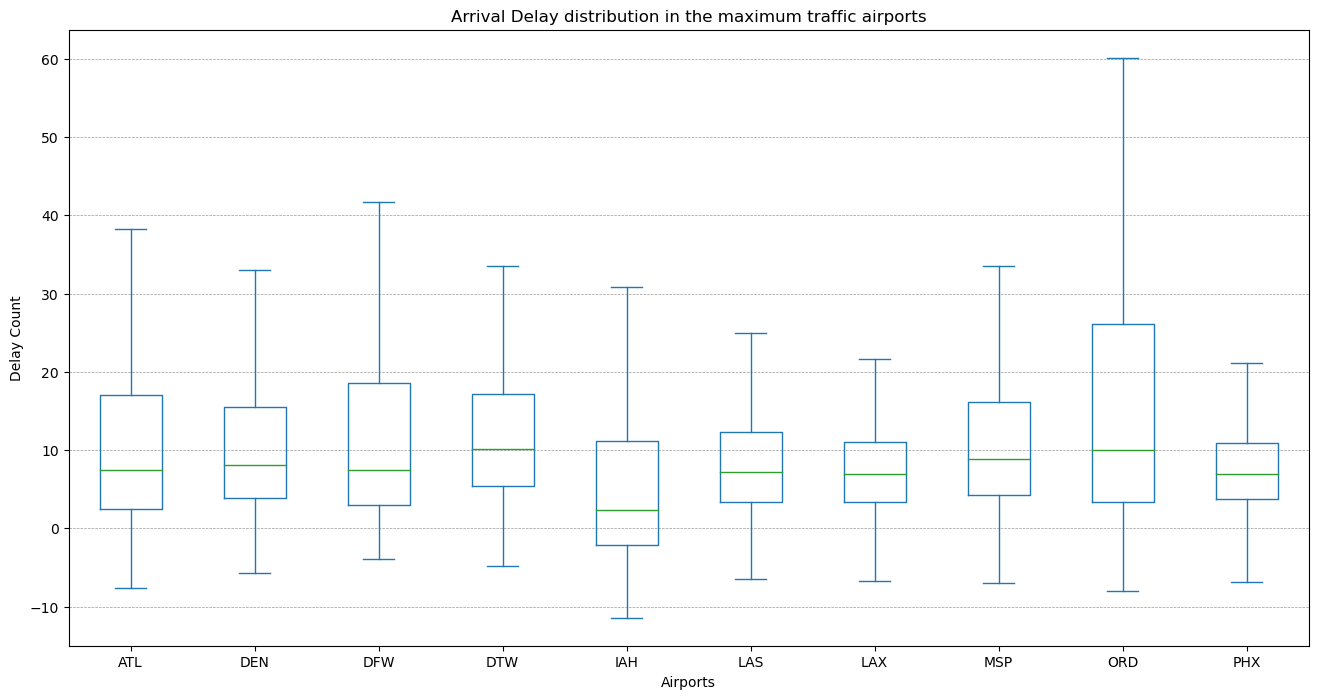

In [54]:
#Try using box plots to compare the day-to-day distribution of delays at high volume air traffic airport:
#flight_2000s.Origin.value_counts().head(10)
hi_volume = flight_2000s['Origin'].value_counts()[:10]
hi_volume_airports_names = hi_volume.index.tolist()
hi_volume_airports = flight_2000s[flight_2000s['Origin'].isin(hi_volume_airports_names)]

hi_volume_airports.pivot_table(index='date', columns='Origin', values='ArrDelay').plot\
                                (kind='box', figsize=[16,8],showfliers=False)

plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
plt.title('Arrival Delay Distribution in the Maximum Traffic Airports', fontsize=16)
plt.xlabel('Airports', fontsize=14)
plt.ylabel('Delay Count', fontsize=14);

In [55]:
#get airport names
airport_names4 = pd.DataFrame({'Code' : hi_volume_airports_names,
                              'Name': map_airport_codes(hi_volume_airports_names)})
airport_names4

,Code,Name
0,ATL,William B Hartsfield-Atlanta Intl
1,ORD,Chicago O'Hare International
2,DFW,Dallas-Fort Worth International
3,DEN,Denver Intl
4,LAX,Los Angeles International
5,PHX,Phoenix Sky Harbor International
6,IAH,George Bush Intercontinental
7,LAS,McCarran International
8,DTW,Detroit Metropolitan-Wayne County
9,MSP,Minneapolis-St Paul Intl


   **Observation:**
    
    Airports like George Bush Intercontinental(IAH) and Phoenix Sky Harbor International(PHX) have significant dispersion
    of delays, while Los Angeles International(LAX) was evenly distributed around the most frequent average delay.
    
    ORD(Chicago O'Hare International), however, was almost twice as delayed all the time, compared to every other high
    volume airport. 

    Which airports are the worst to fly out of? Chicago O'Hare International you can now say that you will 
    (almost certainly) be delayed
        
    If you can help it, avoid connecting flights in Chicago. 

### Dates

**What is the Arival Delay Analysis by Month, Day and Days in the Week?**

In [56]:
def dates_delays(data,title,xlabel):
    delay = pd.DataFrame({'avg_delay' : flight_2000s.groupby([data])['ArrDelay'].mean(),
                           'Count' : flight_2000s.groupby([data]).size()})\
                            .sort_values('avg_delay', ascending=False).reset_index()
    plt.bar(delay[data], delay['avg_delay'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Mean Delay')
    plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)

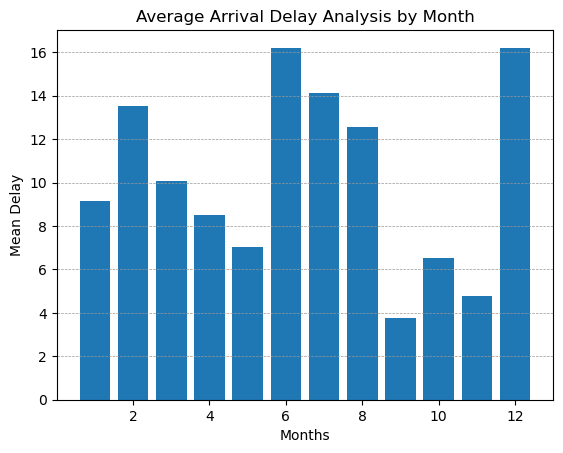

In [57]:
dates_delays('Month','Average Arrival Delay Analysis by Month', 'Months')

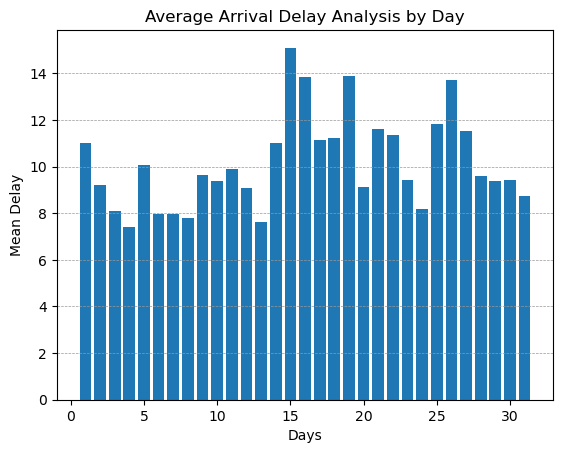

In [58]:
dates_delays('Day', 'Average Arrival Delay Analysis by Day', 'Days')

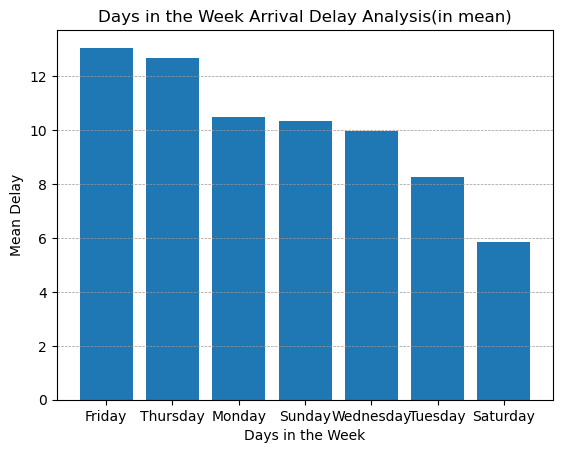

In [59]:
dates_delays('Week_day', 'Days in the Week Arrival Delay Analysis(in mean)', 'Days in the Week')

**Observation:**

    . Summer months of June, July and August together with Winter season in December and February experience high delays.
    This answers our earlier question as it shows no correlation between high volume traffic and delays as winter season
    experiences less traffic and still experiences high delays.
    
    . Autumn months of September, October and November experience minimal delays.
    
    . Friday and Thursday have the highest delays given they are also the most favoured days of travel
    
    . Saturday has the least delays which is also the least favoured day to travel.
    
    . Which day is best for travel? Saturday because it has the least delays and less crowd of people travelling 

### Delay Reasons

**Is there correlations between reasons for delays and types of delays?**

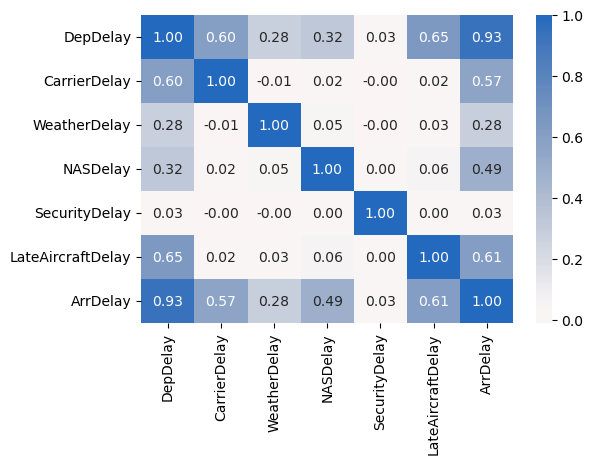

In [60]:
# Plot heatmap of numeric features
delays_list = ['DepDelay','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']
#numeric_vars = ['DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'ArrDelay']

plt.figure(figsize = [6, 4])
sns.heatmap(flight_2000s[delays_list].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

**Observation**

    Strong correlation between;
             
            1) Arrival Delay and; CarrierDelay, LateAircraftDelay and NASDelay. This shows how these delay reasons
            strongly affect the arrival Delay
    
            2) Departure delay and; LateAircraftDelay and Carrier Delay.

### Distance

**Is there a correlation between Arrival Delay and Distance?**

In [61]:
# create df of a 500 sample rwos from the df 2008 flights
flights = flight_2000s.sample(500)
sample = pd.DataFrame() 
sample = sample.append(flights)
sample

,date,Month,Day,Week_day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,Distance,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Traditional
1605012,2007-03-19 00:00:00+00:00,3,19,Monday,1930,1908,2059,2042,NW,131.0,17.0,22.0,DTW,MSY,0,NaN,0,15,926,0,0,0,2,1
2318859,2007-04-28 00:00:00+00:00,4,28,Saturday,1418,1410,1732,1640,B6,117.0,52.0,8.0,MCO,JFK,0,NaN,0,0,944,0,52,0,0,-1
1117651,2007-02-19 00:00:00+00:00,2,19,Monday,1151,1150,1659,1655,CO,163.0,4.0,1.0,ONT,IAH,0,NaN,0,0,1334,0,0,0,0,1
2008834,2007-04-19 00:00:00+00:00,4,19,Thursday,1602,1602,1830,1846,UA,133.0,-16.0,0.0,LAX,SEA,0,NaN,0,0,954,0,0,0,0,1
908301,2007-02-03 00:00:00+00:00,2,3,Saturday,1055,1055,1124,1114,EV,63.0,10.0,0.0,CVG,MKE,0,NaN,0,0,318,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905425,2007-05-08 00:00:00+00:00,5,8,Tuesday,1909,1910,2147,2130,AA,119.0,17.0,-1.0,ORD,DFW,0,NaN,0,0,802,0,17,0,0,1
6460238,2007-11-19 00:00:00+00:00,11,19,Monday,2338,2210,45,2324,MQ,49.0,81.0,88.0,LAX,FAT,0,NaN,0,0,209,0,0,0,81,-1
2264349,2007-04-27 00:00:00+00:00,4,27,Friday,1939,1715,2220,2005,AA,136.0,135.0,144.0,LGA,MCO,0,NaN,0,0,950,8,0,0,127,-1
3286598,2007-06-21 00:00:00+00:00,6,21,Thursday,855,900,1003,1014,US,35.0,-11.0,-5.0,LGA,BOS,0,NaN,0,0,185,0,0,0,0,1


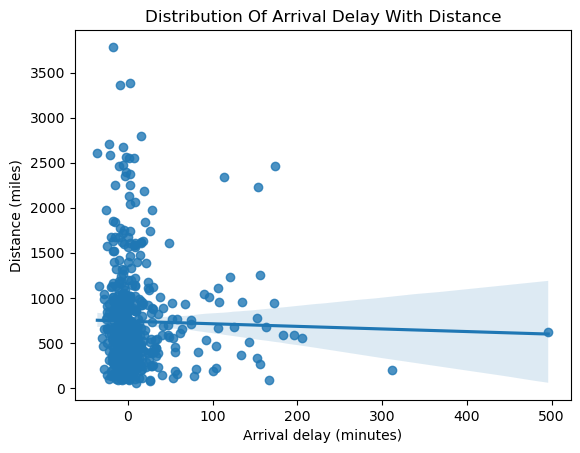

In [62]:
#Arrival delay and distance
sns.regplot(data = sample, x = 'ArrDelay', y = 'Distance');
plt.xlabel('Arrival delay (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Distribution Of Arrival Delay With Distance', fontsize=12);


**Observation**

    . I had to use a sample of the dataset to plot this data because millions of data points would not be clear. 
    The con of this is that i would get different results all the time, therefore it is not a good analysis of this
    relationship.
    
    . Having said that, with every sample, there didn't seem to be a clear correlation between the distance and
    arrival delay but we can clearly see one when we add a line of best fit. We can clearly observe a positive correlation
    indicating as the flight distance increases the greater chance of delay increases too. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


- Vast majority of flights arrive ahead of schedule compaired to late arrivals which is surprising.  

- If we compair the 2000s to a decade ago, flights have improved by both early arrival and late arrival of less than 30 minutes. However, their is a 5% increase of late arrivals of more than 30 minutes which is a concern.

- The two airlines with no delays, Aloha & Hawaiian airlines are the least favoured as they don't have many flight counts which is surprising.

- We saw high travels in the summer seasons and least in the winter seasons, however when it come to arrival delays, both seasons experience high numbers. This therefore shows no correlation between high travel numbers and delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


- LateAircraftDelay and Carrier Delay are the main delay reasons for both arrival and departure delays.

## Multivariate Exploration


**How are arrival delays distributed among the Airlines that fly the busiest routes?**

In [63]:
#show the airline dataframe we created to be used next
df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [64]:
#Carrier, Origin-Dest(Route), arrdelay variables

#Airlines that fly the busiest routes and their arrival delays

#create a dataframe with specific columns from flight 2000s DF 
trial = flight_2000s[['Origin','Dest','ArrDelay','UniqueCarrier']]

#join Origin and Dest Columns and drop columns
trial['Route'] = trial['Origin'].str.cat(trial['Dest'],sep=" - ")
trial = trial[['Route','ArrDelay', 'UniqueCarrier']]

# Creating a dataframe for average delay by route and carrier
carrier_route_delay = pd.DataFrame(trial.groupby(['UniqueCarrier', 'Route'])['ArrDelay'].mean())
#carrier_route_delay.head()

#Add Columns so as to access the index
carrier_route_delay['RouteIndex'] = carrier_route_delay.reset_index(level=0, drop=True).index 
carrier_route_delay['RouteIndex'] = carrier_route_delay['RouteIndex']

carrier_route_delay['Code'] = carrier_route_delay.reset_index(level=1, drop=True).index 
carrier_route_delay['Code'] = carrier_route_delay['Code']

# Merge to get airline names
carrier_route_delay = pd.merge(left=carrier_route_delay, right=df, how='left', on='Code')
carrier_route_delay['Description'] = carrier_route_delay['Description'].str.replace(r"\(.*\)","")

#Top 10 Busiest routes in a list
top_routes = top_origin_dest['Origin - Destination'].unique().tolist()

#Use the RouteIndex column to filter down to only the busiest routes data
carrier_route_delay =carrier_route_delay[ carrier_route_delay['RouteIndex'].isin(top_routes)]

carrier_route_delay


,ArrDelay,RouteIndex,Code,Description
661,10.027473,LAS - LAX,AA,American Airlines Inc.
677,10.256198,LAX - LAS,AA,American Airlines Inc.
932,-0.169248,HNL - LIH,AQ,Aloha Airlines Inc.
934,-1.093908,HNL - OGG,AQ,Aloha Airlines Inc.
942,-0.830953,LIH - HNL,AQ,Aloha Airlines Inc.
948,-2.066364,OGG - HNL,AQ,Aloha Airlines Inc.
1959,0.711230,LAS - LAX,DL,Delta Air Lines Inc.
1972,6.021390,LAX - LAS,DL,Delta Air Lines Inc.
2514,15.267123,LAS - LAX,EV,Atlantic Southeast Airlines
2516,9.619048,LAX - LAS,EV,Atlantic Southeast Airlines


The results in the table above are the average arrival delays for the top ten routes and the airlines that flew those routes. I will use seaborn's categorical plot(catplot) of swarmplot kind to visulize it.

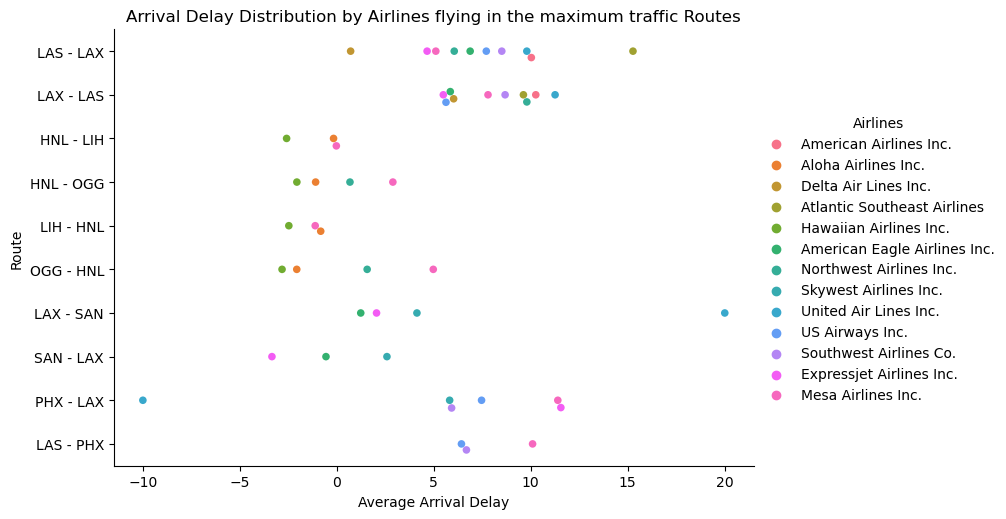

In [65]:
# Plot
#plt.figure(figsize = [12, 6])
g = sns.catplot(data=carrier_route_delay, kind='swarm', x='ArrDelay', y='RouteIndex', hue='Description', height=10, s=30)
g._legend.set_title("Airlines")

# Label
#plt.xlabel('Average Delay')
g.set(xlabel = 'Average Arrival Delay', ylabel = 'Route',\
      title='Arrival Delay Distribution by Airlines flying in the maximum traffic Routes')

# Legend
#plt.legend(long_carrier_list, loc='0', bbox_to_anchor=(1.01, 1.01))
#carriers_order3 = trial3.Carrier.value_counts().index
#plt.legend(map_carrier_codes(carriers_order3), title = 'Airlines', loc='right')


# Show
plt.tight_layout(pad=18)
#plt.savefig('images/charts/routes_by_flights_airline_average_delay_2.png')
plt.show()

In [66]:
#get route names

route_names

,Code,Name
0,LAS,McCarran International
1,LAX,Los Angeles International
2,HNL,Honolulu International
3,OGG,Kahului
4,LIH,Lihue
5,SAN,San Diego International-Lindbergh
6,PHX,Phoenix Sky Harbor International


**Observations:**

      
    . Maximum delay experienced by the busiest routes is 20 minutes with United Airlines. This shows the busiest routes
    don't have high number of delays with the airlines that cover these routes.
    
    . United Airlines experiences the largest delays amongst the airlines in the busiest route with its average delay
    ranging from 9 minutes to 20 minutes.
    
    . Mesa Airlines flies in 8 out of the 10 busiest routes( 4 out of 10, to and fro) making it the highest among the
    airlines. It's average arival delay ranges from -1 to 11 minutes in the routes which is good.
    
    . Southwest Airlines also has good delays ranging from 5 min to 8 minutes. The only shortcoming it has to Mesa
    airline is that it flies to fewer routes.
    
    . Aloha and Hawaiian being the airlines with no delays and early arrivals only fly in 3 out of 10 and 4 out of 10
    of the busiest routes respectively.

    . McCarran International(LAS) - Los Angeles International(LAX) route has 10 airlines flying this route. It is the route
    that experiences the most delays among the airlines ranging from 0 to 15 minutes with all airlines experiencing delays;
            . Delta Airlines experiences the least delay of close to zero meaning it arrives on time with Atlantic
              Southeast Airline experiencing highest delays on this route of an average of 15 minutes
        
     . LAS - PHX route has the least number of airlines flying in it ie 3 and their delays range from 5 to 10 minutes
     which is good.
     
     . LIH - HNL is the route that experiences less delays(to and fro) amongst the airlines that fly this route. Its delays
     ranges from 0 to 2 minutes which is good.
     
     . Does flight route have an affect on delay times per carrier? Yes, we can see that All routes to and fro experience
    the same average delays except LAX - SAN whose delays to and fro, highly defer. 
     
     . Which airline should one consider travelling with in the busiest routes? Aloha, Hawaiian, Southwest Airlines
     and Mesa Airlines.
     
     
     Let's check how they fair across all airports

**How are the arrival delays of Airlines across all airports by their Origin and Destination?**

Text(0, 0.5, 'Delay Count')

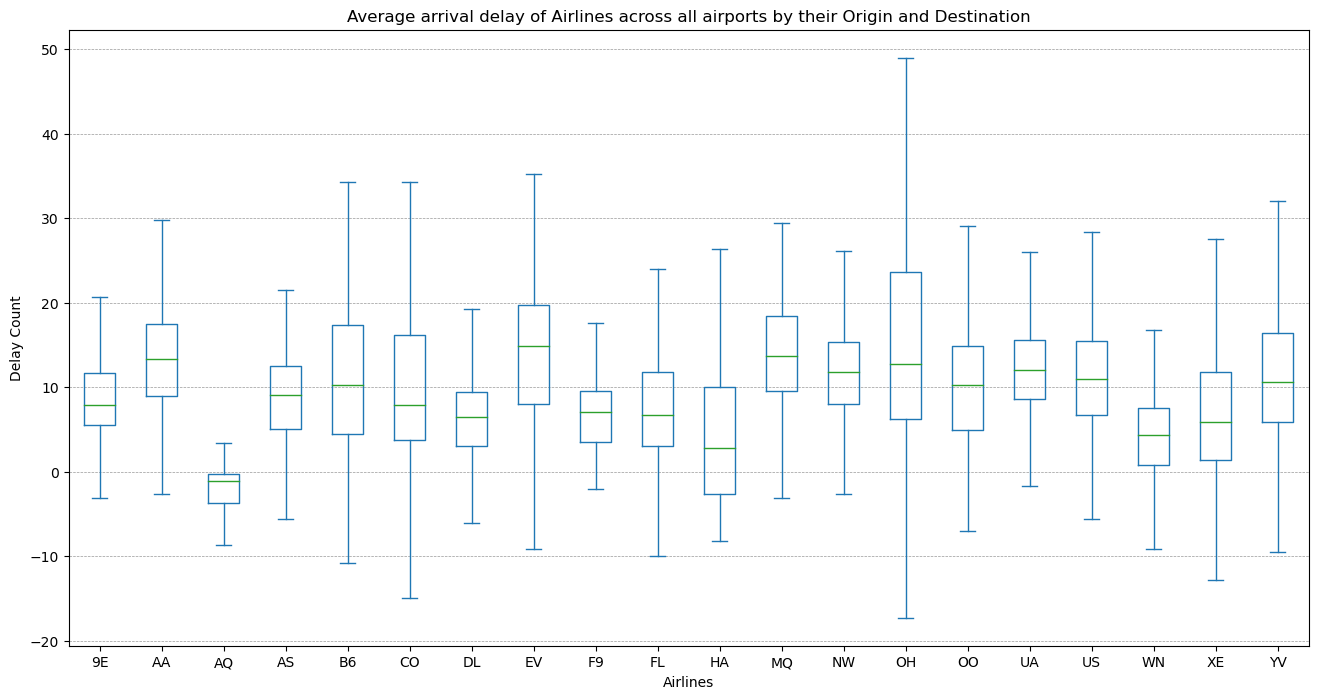

In [67]:
#Visualize the average arrival delay of airlines by Origin and Destination in all airports using box plots

flight_2000s.pivot_table(index=['Origin','Dest'], columns='UniqueCarrier')['ArrDelay'].plot\
                                (kind='box', figsize=[16,8], showfliers=False)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
plt.title('Average arrival delay of Airlines across all airports by their Origin and Destination')
plt.xlabel('Airlines')
plt.ylabel('Delay Count')

In [68]:
#Get Airline Names
busy_airports_names = hi_volume_airports.UniqueCarrier.unique().tolist()
airport_names5 = pd.DataFrame({'Code' : busy_airports_names,
                              'Name': map_carrier_codes(busy_airports_names)})
airport_names5

,Code,Name
0,WN,Southwest Airlines Co.
1,XE,Expressjet Airlines Inc.
2,YV,Mesa Airlines Inc.
3,OH,Comair Inc.
4,OO,Skywest Airlines Inc.
5,UA,United Air Lines Inc.
6,US,US Airways Inc. (Merged with America West 9/05...
7,DL,Delta Air Lines Inc.
8,EV,Atlantic Southeast Airlines
9,F9,Frontier Airlines Inc.


**Observations:**
    
    . Out of all the airlines, Comair Inc(OH) Airline  experiences the highest consistent delays in all airports then
    followed by Continental Air Lines(CO) then Atlantic Southeast Airlines(EV). 
    
    . Aloha Airlines(AQ) experiences the lowest delays distribution among the airlines on the busiest routes followed by
    Southwest Airlines(WN) then Hawaiian Airlines(HA).
    
    . Which airlines are consistent with minimal to no delays in busiest routes and all routes in general? 
    Aloha Airlines(AQ), Southwest Airlines(WN) and Hawaiian Airlines(HA)
    

**How do the reasons for delays distributed over months and is there any difference among their distributions?**

In [69]:
# Prepare dataset to plot reasons of delay as categories

month_delays = flight_2000s.groupby('Month').mean().reset_index()

#drop some columns
month_delays = month_delays[['Month','CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
month_delays['Month'] = month_delays['Month'].astype(str).str.zfill(2)

month_tidy = month_delays.melt(id_vars='Month').sort_values('Month')
month_tidy.sample(20)

,Month,variable,value
23,12,WeatherDelay,1.179468
39,04,LateAircraftDelay,4.692908
2,03,CarrierDelay,4.103619
45,10,LateAircraftDelay,3.762204
14,03,WeatherDelay,0.651889
41,06,LateAircraftDelay,7.167246
30,07,NASDelay,4.442175
28,05,NASDelay,3.311230
29,06,NASDelay,5.319872
16,05,WeatherDelay,0.613270


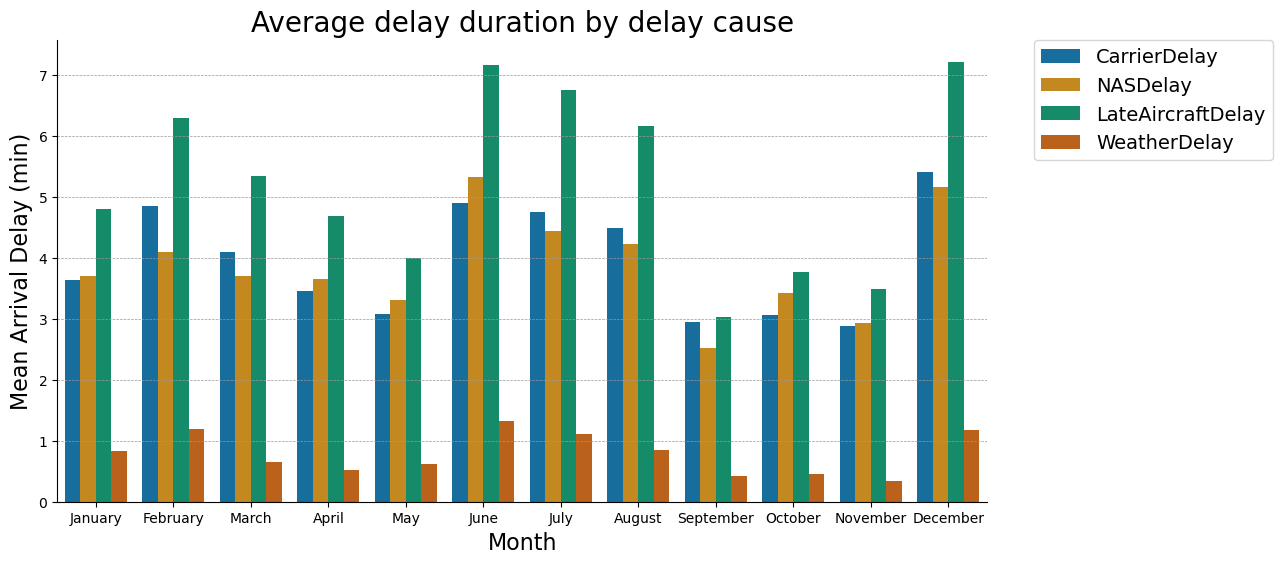

In [70]:
# Plot mean delays by the reasons and DepDelay to compare

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#del_colors = ['#fe7f2d', '#0077b6', '#a1c181', '#fcca46', '#619b8a']

plt.figure(figsize = [12, 6])
ax = sns.barplot(data = month_tidy, x = 'Month', y = 'value', hue = 'variable', palette='colorblind') #use vlag or vlag_r
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
ax.set_xticklabels(months)
ax.set_ylabel('Mean Arrival Delay (min)', fontsize=16)
ax.set_title('Average delay duration by delay cause', fontsize=20)
ax.set_xlabel('Month', fontsize=16)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
sns.despine();

**Observations:**

    . Late Aircraft Delay is the highest delay reason and experienced highly in winter season (December, January and
    February)together with Summer season (June, July and August). In winter it could be due to the clearing of 
    snow off the runways and in the summer it could be due to the high people traffic.   
    
    . Carrier Delay is the second highest delay and also experienced highly in winter season (December, January and
    February) together with Summer season (June, July and August)
    
    . Weather Delay is highly distributed in Winter season(December, January and February) compaired to summer season
    (June, July and August). This could be so due to the snow.

**How are the delay reasons distributed among airlines?**

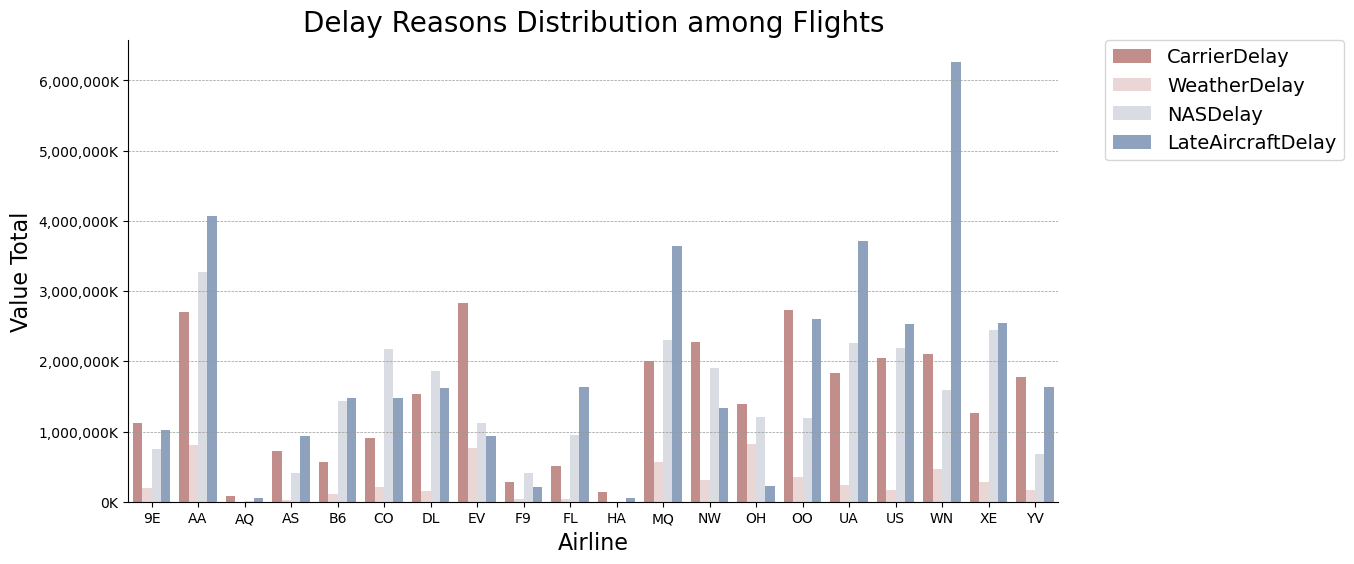

In [71]:
airline_reason_delays = flight_2000s.groupby('UniqueCarrier').sum().reset_index()
#airline_names = airline_reason_delays['UniqueCarrier'].unique().tolist()
airline_reason_delays = airline_reason_delays[['UniqueCarrier','CarrierDelay','WeatherDelay','NASDelay', 'LateAircraftDelay']]
delay_list = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

airline_tidy = airline_reason_delays.melt(id_vars='UniqueCarrier', value_vars =delay_list)

plt.figure(figsize = [12, 6])
ax = sns.barplot(data=airline_tidy,x='UniqueCarrier', y='value', hue='variable', palette='vlag_r' )
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
#ax.set_xticklabels(months)
#ax.set_xticklabels(map_carrier_codes(airline_names), rotation = 50)
#ax.get_xticks(rotation=25)

#ax.set_xticklabels(ax.get_xticks(), rotation = 25)
ax.set_ylabel('Value Total', fontsize=16)
ax.set_title('Delay Reasons Distribution among Flights', fontsize=20)
ax.set_xlabel('Airline', fontsize=16)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1) + 'K'))
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
sns.despine();

In [72]:
#Get Airline Names
all_airports_names = airline_reason_delays.UniqueCarrier.unique().tolist()
airport_names6 = pd.DataFrame({'Code' : all_airports_names,
                              'Name': map_carrier_codes(all_airports_names)})
airport_names6

,Code,Name
0,9E,Pinnacle Airlines Inc.
1,AA,American Airlines Inc.
2,AQ,Aloha Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,CO,Continental Air Lines Inc.
6,DL,Delta Air Lines Inc.
7,EV,Atlantic Southeast Airlines
8,F9,Frontier Airlines Inc.
9,FL,AirTran Airways Corporation


**Observations:**
 
     . Southwest Airlines(WN) experiences the highest LateAircraft Delays followed by American Airlines(AA). 
     This is surprising as they are the top two airlines with the highest number of flights and lowest delays in general. 
     
     . Atlantic Southeast Airlines(EV) experiences the highest Carrier Delay followed by American Airlines(AA)
     and Skywest Airlines(OO). 
     
     . Aloha Airlines(AQ) and Hawaiian Airlines(HA) experience the least distribution of delay reasons.
     They also experience the least arrival delays among all airlines
     
     . Which Airline is one guaranteed less delays? Aloha Airlines(AQ) and Hawaiian Airlines(HA)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Southwest Airlines proved why it has the highest flight numbers as it experiences the least number of delays among all the airlines and also among the top busiest airlines. 

- 

### Were there any interesting or surprising interactions between features?

- I expected weather delay to be higher in winter months but surprising its distribution is higher in the summer months. 

- Southwest Airlines(WN) experiences the highest LateAircraft Delays followed by American Airlines(AA). This is surprising as they are the top two airlines with the highest number of flights and lowest delays in general. 

- Aloha Airlines(AQ) and Hawaiian Airlines(HA) should have more flight numbers considering they don't experience delays. Would be intresting to see dataset of past year 2007 to see if their flight numbers have improved.

- 


## Conclusions

The insights indicate that viewing delay as an aggregate of different components can reveal insights otherwise hidden. From our data, we can assess passengers fly more during the summer and least during the winter and more during midweek versus the weekend. The most popular time to travel for passengers is 4 pm for arrival and 8am for departure. Most flights average a distance of 722 miles. 

**Analysis Answers**

**The most arrival delay time for the 2007 year for the flights?** 
- The longest delay was 2598 minutes(equals 43 hours and 18 minutes) 

**How is the Arrival delay distributed?**
- There are delayed arrivals as well as earlier arrivals and the most of them are between -42 to 48 min differ of the scheduled time.

**Which times are airports the busiest in terms of flights by each hour?**
- 6am to 10pm are the most favoured time for travel with 4 pm for arrival and 8am for departure prefered

**Which airlines have the most flights?** 
- Southwest Airlines

**Which Airline is one guaranteed less delays?** 
- Aloha Airlines(AQ), Hawaiian Airlines(HA) and Southwest Airlines(WN)

**Which airports are the worst to fly out of?** 
- Nantucket Memorial(ACK) airport
- Ontario International(ONT) airport

**Which airports are the busiest in terms of inbound and outbound flights?**
- William B Hartsfield - Atlanta Intl (ATL)

**Which routes are the most popular?**
- Kahului(OGG) Airport - Honolulu International(HNL) Airport

**Which routes experiences the most delays?**
- Ontario International(ONT) - Washington Dulles International(IAD)

**When is the popular day of week/date of month/month of the year to fly?**
- Day - Monday, Thursday and Friday
- Month - July and August

**What time of the week passengers fly the most?**
- Weekdays

**How does season change the frequency and the destination of travel?**
- Summer increases the frequency of average flights whilst winter decreases it. More travels in the summer and the least travels in winter season

**Which day is best for travel?**
- Saturday because it has the least delays and less crowd of people travelling




> **References**

- Suppress warnings from final output: https://www.pythonpool.com/suppress-warnings-in-python/
- Removing Outliers: https://www.youtube.com/watch?v=NEuU1gaUyww
- DT Day of Week: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html
- multiple subplots: https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots
- Grid lines: https://www.statology.org/matplotlib-horizontal-gridlines/
- Melting Dataframe: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- Change Seaborn plot size: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
- Rename Seaborn legend: https://stackoverflow.com/questions/53116532/modify-seaborn-line-relplot-legend-title
- Pie charts: https://www.youtube.com/watch?v=ZJywX0kcmQI&t=546s, https://plotly.com/python/pie-charts/ and https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
- About catplot: https://towardsdatascience.com/mastering-catplot-in-seaborn-categorical-data-visualization-guide-abab7b2067af
- Histogram guide: https://chartio.com/learn/charts/histogram-complete-guide/
- Matplotlib pyplot axes formatter: https://stackoverflow.com/questions/25119193/matplotlib-pyplot-axes-formatter
- Interprating Boxplots: https://www.youtube.com/watch?v=Hm6Mra5XJSs&t=182s
- Removing outliers on boxplots: https://www.statology.org/seaborn-boxplot-remove-outliers/
- Understanding violin plots: https://chartio.com/learn/charts/violin-plot-complete-guide/








